In [ ]:
CPU_data<-read.csv("./sample_data/Intel_CPUs.csv", fileEncoding = 'latin1')
head(CPU_data,4)


,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,⋯,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,7th Generation IntelÂ® Coreâ¢ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4,1.30 GHz,⋯,100Â°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2,8th Generation IntelÂ® Coreâ¢ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8,1.60 GHz,⋯,100Â°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
3,8th Generation IntelÂ® Coreâ¢ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8,1.80 GHz,⋯,100Â°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
4,IntelÂ® Coreâ¢ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8,3.60 GHz,⋯,66.8Â°C,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,,Yes


In [ ]:
install.packages("dplyr", type = "source")
install.packages("stringr", type = "source")
install.packages("GGally", type = "source")
install.packages("corrplot", type = "source")
install.packages("caTools", type = "source")
install.packages("MASS", type = "source")
install.packages("car", type = "source")
install.packages("e1071", type = "source")
install.packages("nortest", type = "source")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pr

In [ ]:
# Import libraries
install.packages("lifecycle")

library (dplyr)
library (stringr)
library (GGally)
library (corrplot)
library (caTools)
library (MASS) # for using Stepwise model
library (car)
library (e1071) # for using ANOVA
library (nortest)
library (ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [ ]:
# Viewing the data structure
str(CPU_data)

'data.frame':	2283 obs. of  45 variables:
 $ Product_Collection                      : chr  "7th Generation IntelÂ® Coreâ\u0084¢ i7 Processors" "8th Generation IntelÂ® Coreâ\u0084¢ i5 Processors" "8th Generation IntelÂ® Coreâ\u0084¢ i7 Processors" "IntelÂ® Coreâ\u0084¢ X-series Processors" ...
 $ Vertical_Segment                        : chr  "Mobile" "Mobile" "Mobile" "Desktop" ...
 $ Processor_Number                        : chr  "i7-7Y75" "i5-8250U" "i7-8550U" "i7-3820" ...
 $ Status                                  : chr  "Launched" "Launched" "Launched" "End of Life" ...
 $ Launch_Date                             : chr  "Q3'16" "Q3'17" "Q3'17" "Q1'12" ...
 $ Lithography                             : chr  "14 nm" "14 nm" "14 nm" "32 nm" ...
 $ Recommended_Customer_Price              : chr  "$393.00 " "$297.00 " "$409.00 " "$305.00 " ...
 $ nb_of_Cores                             : int  2 4 4 4 2 2 2 2 2 1 ...
 $ nb_of_Threads                           : int  4 8 8 8 4 2 2 2 2 NA ..

In [ ]:
# Get the summary
summary(CPU_data)

 Product_Collection Vertical_Segment   Processor_Number      Status         
 Length:2283        Length:2283        Length:2283        Length:2283       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Launch_Date        Lithography        Recommended_Customer_Price
 Length:2283        Length:2283        Length:2283               
 Class :character   Class :character   Class :character          
 Mode  :character   Mode  :character   Mode  :character          
                                                                 
                                                      

In [ ]:

# Checking the missing values
# is.na(CPU_data) returns a logical matrix of the same size as your dataset data, where each element is TRUE if the corresponding element in data is NA and FALSE otherwise.
# any() function checks if any element in the logical matrix is TRUE. If at least one element is TRUE, any() returns TRUE; otherwise, it returns FALSE.
# therefore, there is the fact that the dataset has missing values since the output is TRUE.
any(is.na(CPU_data))


# Check which columns have missing values
columns_with_missing <- colSums(is.na(CPU_data)) > 0

# Display column names with missing values
names(columns_with_missing)[columns_with_missing]

# Output: 'nb_of_Threads','Max_nb_of_Memory_Channels','Processor_Graphics_','Support_4k','OpenGL_Support','Max_nb_of_PCI_Express_Lanes'





[1] TRUE

[1] "nb_of_Threads"               "Max_nb_of_Memory_Channels"  
[3] "Processor_Graphics_"         "Support_4k"                 
[5] "OpenGL_Support"              "Max_nb_of_PCI_Express_Lanes"

In [ ]:
# Calculating the number of missing values in each column
# '2' specifies the column
# 'sum' indicates the using function
h <- apply(is.na(CPU_data),2,sum)
print(h)

                      Product_Collection 
                                       0 
                        Vertical_Segment 
                                       0 
                        Processor_Number 
                                       0 
                                  Status 
                                       0 
                             Launch_Date 
                                       0 
                             Lithography 
                                       0 
              Recommended_Customer_Price 
                                       0 
                             nb_of_Cores 
                                       0 
                           nb_of_Threads 
                                     856 
                Processor_Base_Frequency 
                                       0 
                     Max_Turbo_Frequency 
                                       0 
                                   Cache 
                                  

In [ ]:
# Trim whitespace from column names
colnames(CPU_data) <- trimws(colnames(CPU_data))

# Calculate the sum of missing values for each column
missing_counts <- apply(is.na(CPU_data), 2, sum)

# Identify columns with missing values in all rows
columns_with_missing_all <- names(missing_counts)[missing_counts == nrow(CPU_data)]

# Display column names with missing values in all rows
cat(columns_with_missing_all, sep="\n")




Processor_Graphics_
Support_4k
OpenGL_Support


In [ ]:
# Deleting the columns that are not necessary in analyzing the dataset (including the three above fields)
# Define a vector of column names to remove

columns_to_remove <- c("Product_Collection", "Vertical_Segment"
                      ,"Processor_Number","Status","Launch_Date","Cache"
                      ,"Bus_Speed","Conflict_Free","Memory_Types"
                      ,"Processor_Graphics_","Graphics_Output"
                      ,"Support_4k","Max_Resolution_HDMI"
                      ,"Max_Resolution_DP","Max_Resolution_eDP_Integrated_Flat_Panel"
                      ,"DirectX_Support","OpenGL_Support"
                      ,"PCI_Express_Revision","PCI_Express_Configurations_"
                      ,"Instruction_Set_Extensions")

# Remove specified columns from the dataset
CPU_data <- CPU_data[, !(names(CPU_data) %in% columns_to_remove)]
# After deleting
head(CPU_data)

,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,TDP,Embedded_Options_Available,Max_Memory_Size,Max_nb_of_Memory_Channels,⋯,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,14 nm,$393.00,2,4,1.30 GHz,3.60 GHz,4.5 W,No,16 GB,2,⋯,10,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
2,14 nm,$297.00,4,8,1.60 GHz,3.40 GHz,15 W,No,32 GB,2,⋯,12,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
3,14 nm,$409.00,4,8,1.80 GHz,4.00 GHz,15 W,No,32 GB,2,⋯,12,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
4,32 nm,$305.00,4,8,3.60 GHz,3.80 GHz,130 W,No,64.23 GB,4,⋯,40,66.8Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,,Yes
5,14 nm,$281.00,2,4,1.20 GHz,3.30 GHz,4.5 W,No,16 GB,2,⋯,10,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
6,14 nm,$107.00,2,2,1.50 GHz,,15 W,No,16 GB,2,⋯,12,105Â°C,No,Yes,Yes,64-bit,Yes,Yes,Yes,Yes


In [ ]:
# Convert "" and "\n- " to NA
CPU_data[(CPU_data == "") | (CPU_data == "\n-")] <- NA
head(CPU_data)

,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,TDP,Embedded_Options_Available,Max_Memory_Size,Max_nb_of_Memory_Channels,⋯,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,14 nm,$393.00,2,4,1.30 GHz,3.60 GHz,4.5 W,No,16 GB,2,⋯,10,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
2,14 nm,$297.00,4,8,1.60 GHz,3.40 GHz,15 W,No,32 GB,2,⋯,12,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
3,14 nm,$409.00,4,8,1.80 GHz,4.00 GHz,15 W,No,32 GB,2,⋯,12,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
4,32 nm,$305.00,4,8,3.60 GHz,3.80 GHz,130 W,No,64.23 GB,4,⋯,40,66.8Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,NA,Yes
5,14 nm,$281.00,2,4,1.20 GHz,3.30 GHz,4.5 W,No,16 GB,2,⋯,10,100Â°C,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
6,14 nm,$107.00,2,2,1.50 GHz,NA,15 W,No,16 GB,2,⋯,12,105Â°C,No,Yes,Yes,64-bit,Yes,Yes,Yes,Yes


In [ ]:
CPU_data $Lithography <- as.numeric(sub("nm", "", CPU_data $Lithography))

CPU_data $Max_Turbo_Frequency <- as.numeric(sub("GHz", "", CPU_data $Max_Turbo_Frequency))

CPU_data $TDP <- as.numeric(sub("W", "", CPU_data $TDP ))

CPU_data $Max_Memory_Size <- as.numeric(sub("GB", "", CPU_data $Max_Memory_Size))

CPU_data $Max_Memory_Bandwidth <- as.numeric(sub("GB/s", "", CPU_data $Max_Memory_Bandwidth))

CPU_data $Graphics_Base_Frequency <- as.numeric(sub ("MHz", "", CPU_data $Graphics_Base_Frequency))

CPU_data $Graphics_Video_Max_Memory <- as.numeric(sub ("GB", "", CPU_data $Graphics_Video_Max_Memory))

CPU_data $T <- as.numeric (sub("°C", "", CPU_data $T))



# Check for NAs after conversion
any(is.na(CPU_data))

head(CPU_data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] TRUE

,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,TDP,Embedded_Options_Available,Max_Memory_Size,Max_nb_of_Memory_Channels,⋯,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
,<dbl>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,14,$393.00,2,4,1.30 GHz,3.6,4.5,No,16.00,2,⋯,10,NA,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
2,14,$297.00,4,8,1.60 GHz,3.4,15.0,No,32.00,2,⋯,12,NA,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
3,14,$409.00,4,8,1.80 GHz,4.0,15.0,No,32.00,2,⋯,12,NA,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
4,32,$305.00,4,8,3.60 GHz,3.8,130.0,No,64.23,4,⋯,40,NA,Yes,Yes,Yes,64-bit,Yes,Yes,NA,Yes
5,14,$281.00,2,4,1.20 GHz,3.3,4.5,No,16.00,2,⋯,10,NA,Yes,Yes,Yes,64-bit,Yes,Yes,Yes,Yes
6,14,$107.00,2,2,1.50 GHz,NA,15.0,No,16.00,2,⋯,12,NA,No,Yes,Yes,64-bit,Yes,Yes,Yes,Yes


In [ ]:
# Graphics_Max_Dynamic_Frequency
# Subset Data by GHz Frequency
subset_GHz <- CPU_data[grepl("GHz", CPU_data$Graphics_Max_Dynamic_Frequency, ignore.case = TRUE), ]

# Remove GHz Frequency Rows
CPU_data <- CPU_data[!grepl("GHz", CPU_data$Graphics_Max_Dynamic_Frequency, ignore.case = TRUE), ]

# Remove "GHz" from Subset_GHz Column
subset_GHz$Graphics_Max_Dynamic_Frequency <- gsub("GHz", "", subset_GHz$Graphics_Max_Dynamic_Frequency, fixed = TRUE)

# Convert Subset_GHz Column to Numeric
subset_GHz$Graphics_Max_Dynamic_Frequency <- as.numeric(subset_GHz$Graphics_Max_Dynamic_Frequency)

# Convert Subset_GHz Frequency to MHz
subset_GHz$Graphics_Max_Dynamic_Frequency <- subset_GHz$Graphics_Max_Dynamic_Frequency * (1000)

# Remove "MHz" from CPU_data Column
CPU_data$Graphics_Max_Dynamic_Frequency <- gsub("MHz", "", CPU_data$Graphics_Max_Dynamic_Frequency, fixed = TRUE)

# Convert CPU_data Column to Numeric
CPU_data$Graphics_Max_Dynamic_Frequency <- as.numeric(CPU_data$Graphics_Max_Dynamic_Frequency)

# Merge Data
CPU_data <- bind_rows(CPU_data, subset_GHz)

# Processor_Base_Frequency

# Create a subset of data containing only rows where Processor_Base_Frequency column contains "GHz"
subset_GHz <- CPU_data[grepl("GHz", CPU_data$Processor_Base_Frequency, ignore.case = TRUE), ]

# Remove rows from the original dataframe where Processor_Base_Frequency contains "GHz"
CPU_data <- CPU_data[!grepl("GHz", CPU_data$Processor_Base_Frequency, ignore.case = TRUE), ]

# Remove "GHz" from the Processor_Base_Frequency column in the subset dataframe
subset_GHz$Processor_Base_Frequency <- gsub("GHz", "", subset_GHz$Processor_Base_Frequency, fixed = TRUE)

# Convert Processor_Base_Frequency column in the subset dataframe to numeric
subset_GHz$Processor_Base_Frequency <- as.numeric(subset_GHz$Processor_Base_Frequency)

# Convert Processor_Base_Frequency from GHz to MHz by multiplying by 1000
subset_GHz$Processor_Base_Frequency <- subset_GHz$Processor_Base_Frequency * (1000)

# Remove " MHz " from the Processor_Base_Frequency column in the original dataframe
CPU_data$Processor_Base_Frequency <- gsub("MHz", "", CPU_data$Processor_Base_Frequency, fixed = TRUE)

# Convert Processor_Base_Frequency column in the original dataframe to numeric
CPU_data$Processor_Base_Frequency <- as.numeric(CPU_data$Processor_Base_Frequency)

# Merge the subset dataframe with the original dataframe
CPU_data <- bind_rows(CPU_data, subset_GHz)


In [ ]:
# Filling missing values for specified columns
columns_to_fill_mean <- c("Lithography", "nb_of_Cores", "nb_of_Threads", "Max_Turbo_Frequency",
                     "TDP", "Max_Memory_Size", "Max_nb_of_Memory_Channels", "Max_Memory_Bandwidth",
                     "Graphics_Base_Frequency", "Graphics_Video_Max_Memory", "Max_nb_of_PCI_Express_Lanes",
                     "T", "Graphics_Max_Dynamic_Frequency", "Processor_Base_Frequency")

# Loop through each column
for (col in columns_to_fill_mean) {
  # Calculate the mean of the column, excluding missing values
  mean_value <- mean(CPU_data[[col]], na.rm = TRUE)

  # Replace missing values with the mean
  CPU_data[[col]][is.na(CPU_data[[col]])] <- mean_value
}

# Convert Recommended_Customer_Price column to numeric
CPU_data $Recommended_Customer_Price <- gsub ("$", "", CPU_data $Recommended_Customer_Price,fixed = TRUE)
CPU_data $Recommended_Customer_Price <- as.numeric(CPU_data $Recommended_Customer_Price)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
# Define a function to fill missing values with mode
fillmode <- function(column) {
  # Calculate mode value
  mode_value <- names(sort(table(column), decreasing = TRUE))[1]

  # Replace missing values with mode value
  column[is.na(column)] <- mode_value

  # Return the modified column
  return(column)
}

# Specify the columns to fill missing values for
columns_to_fill_2 <- c("Embedded_Options_Available", "ECC_Memory_Supported", "Intel_Hyper_Threading_Technology_",
              "Intel_Virtualization_Technology_VTx_", "Intel_64_", "Instruction_Set", "Idle_States",
              "Thermal_Monitoring_Technologies", "Secure_Key", "Execute_Disable_Bit")

# Apply the fillmode function to specified columns
CPU_data[columns_to_fill_2] <- lapply(CPU_data[columns_to_fill_2], fillmode)


In [ ]:
# Re-check
any(is.na(CPU_data))

missing_values <- apply(is.na(CPU_data), 2, sum)

# Print the result horizontally
print(missing_values)

[1] TRUE

                         Lithography           Recommended_Customer_Price 
                                   0                                 1473 
                         nb_of_Cores                        nb_of_Threads 
                                   0                                    0 
            Processor_Base_Frequency                  Max_Turbo_Frequency 
                                   0                                    0 
                                 TDP           Embedded_Options_Available 
                                   0                                    0 
                     Max_Memory_Size            Max_nb_of_Memory_Channels 
                                   0                                    0 
                Max_Memory_Bandwidth                 ECC_Memory_Supported 
                                   0                                    0 
             Graphics_Base_Frequency       Graphics_Max_Dynamic_Frequency 
                         

In [ ]:
# Transform categorical variables to numerical variables

# Convert "Embedded_Options_Available" to numerical (1 for "Yes", 0 for "No")
CPU_data$Embedded_Options_Available <- ifelse(CPU_data$Embedded_Options_Available == "Yes", 1, 0)

# Convert "ECC_Memory_Supported" to numerical (1 for "Yes", 0 for "No")
CPU_data$ECC_Memory_Supported <- ifelse(CPU_data$ECC_Memory_Supported == "Yes", 1, 0)

# Convert "Intel_Hyper_Threading_Technology_" to numerical (1 for "Yes", 0 for "No")
CPU_data$Intel_Hyper_Threading_Technology_ <- ifelse(CPU_data$Intel_Hyper_Threading_Technology == "Yes", 1, 0)

# Convert "Intel_Virtualization_Technology_VTx_" to numerical (1 for "Yes", 0 for "No")
CPU_data$Intel_Virtualization_Technology_VTx_ <- ifelse(CPU_data$Intel_Virtualization_Technology_VTx == "Yes", 1, 0)

# Convert "Intel_64_" to numerical (1 for "Yes", 0 for "No")
CPU_data$Intel_64_ <- ifelse(CPU_data$Intel_64_ == "Yes", 1, 0)

# Convert "Idle_States" to numerical (1 for "Yes", 0 for "No")
CPU_data$Idle_States <- ifelse(CPU_data$Idle_States == "Yes", 1, 0)

# Convert "Thermal_Monitoring_Technologies" to numerical (1 for "Yes", 0 for "No")
CPU_data$Thermal_Monitoring_Technologies <- ifelse(CPU_data$Thermal_Monitoring_Technologies == "Yes", 1, 0)

# Convert "Secure_Key" to numerical (1 for "Yes", 0 for "No")
CPU_data$Secure_Key <- ifelse(CPU_data$Secure_Key == "Yes", 1, 0)

# Convert "Execute_Disable_Bit" to numerical (1 for "Yes", 0 for "No")
CPU_data$Execute_Disable_Bit <- ifelse(CPU_data$Execute_Disable_Bit == "Yes", 1, 0)

# Convert "Instruction_Set" to numerical (0 for "32-bit", 1 for "64-bit", 2 for "Itanium")
CPU_data$Instruction_Set <- gsub("32-bit", "0", CPU_data$Instruction_Set, fixed = TRUE)
CPU_data$Instruction_Set <- gsub("64-bit", "1", CPU_data$Instruction_Set, fixed = TRUE)
CPU_data$Instruction_Set <- gsub("Itanium 1", "2", CPU_data$Instruction_Set, fixed = TRUE)
CPU_data$Instruction_Set <- as.numeric(CPU_data$Instruction_Set)


In [ ]:
# Re-check
any(is.na(CPU_data))


missing_values <- apply(is.na(CPU_data), 2, sum)

# Print the result horizontally
print(missing_values)


[1] TRUE

                         Lithography           Recommended_Customer_Price 
                                   0                                 1473 
                         nb_of_Cores                        nb_of_Threads 
                                   0                                    0 
            Processor_Base_Frequency                  Max_Turbo_Frequency 
                                   0                                    0 
                                 TDP           Embedded_Options_Available 
                                   0                                    0 
                     Max_Memory_Size            Max_nb_of_Memory_Channels 
                                   0                                    0 
                Max_Memory_Bandwidth                 ECC_Memory_Supported 
                                   0                                    0 
             Graphics_Base_Frequency       Graphics_Max_Dynamic_Frequency 
                         

In [ ]:
# Create CPU_train dataset without missing values in Recommended_Customer_Price
CPU_train <- CPU_data[complete.cases(CPU_data$Recommended_Customer_Price), ]

# Create CPU_test dataset with missing values in Recommended_Customer_Price
CPU_test <- CPU_data[!complete.cases(CPU_data$Recommended_Customer_Price), ]

# Summary
summary(CPU_train)


  Lithography     Recommended_Customer_Price  nb_of_Cores     nb_of_Threads  
 Min.   : 14.00   Min.   :  2.54             Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 14.00   1st Qu.:107.00             1st Qu.: 2.000   1st Qu.: 4.00  
 Median : 22.00   Median :239.50             Median : 2.000   Median : 4.00  
 Mean   : 26.57   Mean   :268.37             Mean   : 3.148   Mean   : 5.77  
 3rd Qu.: 32.00   3rd Qu.:378.00             3rd Qu.: 4.000   3rd Qu.: 8.00  
 Max.   :130.00   Max.   :999.00             Max.   :16.000   Max.   :24.00  
 Processor_Base_Frequency Max_Turbo_Frequency      TDP         
 Min.   :  32             Min.   :1.300       Min.   :  0.025  
 1st Qu.:1800             1st Qu.:3.198       1st Qu.: 17.000  
 Median :2300             Median :3.198       Median : 35.000  
 Mean   :2304             Mean   :3.181       Mean   : 44.061  
 3rd Qu.:2800             3rd Qu.:3.200       3rd Qu.: 60.242  
 Max.   :4100             Max.   :4.500       Max.   :140.000  
 Embed

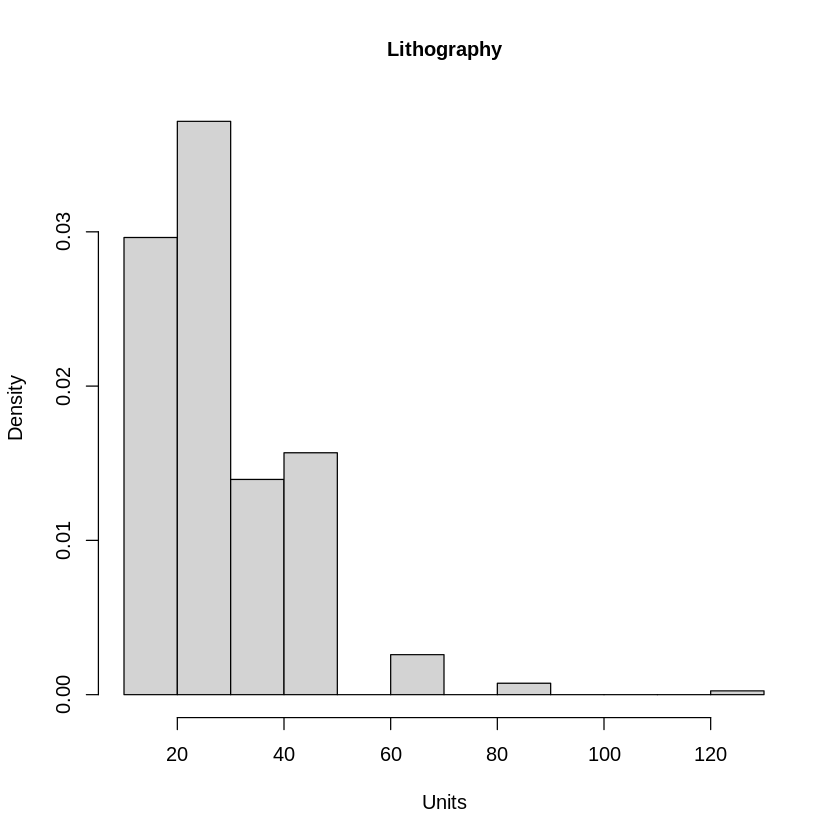

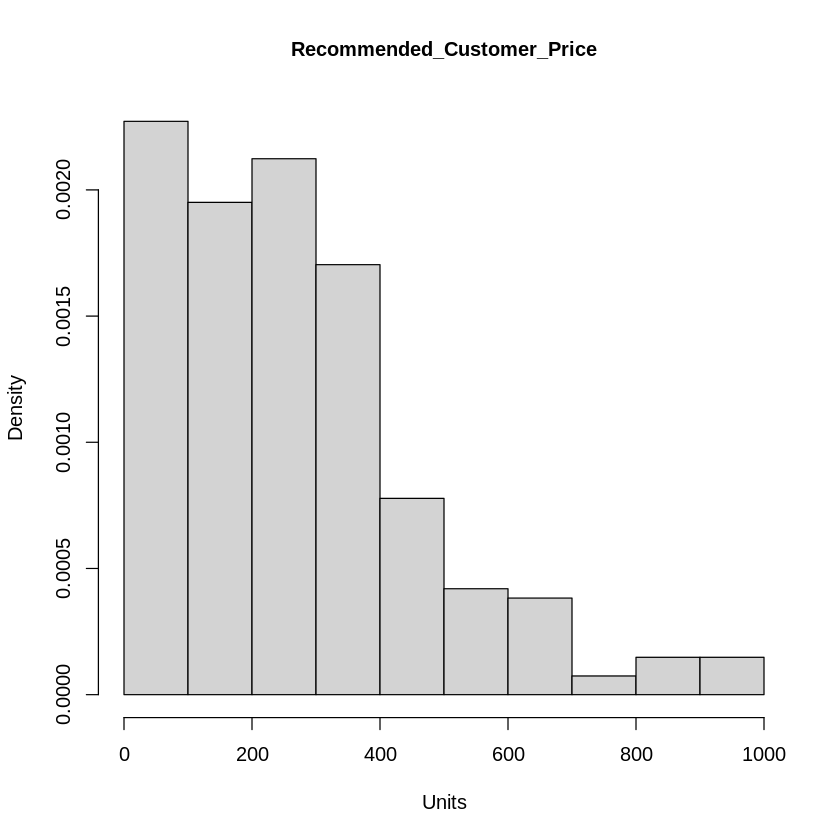

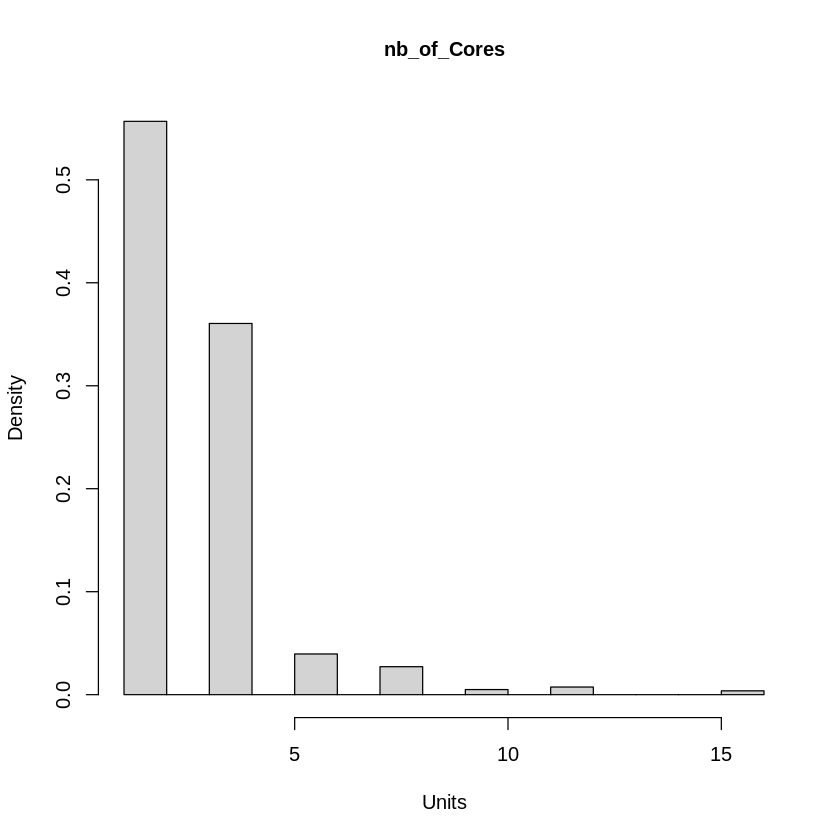

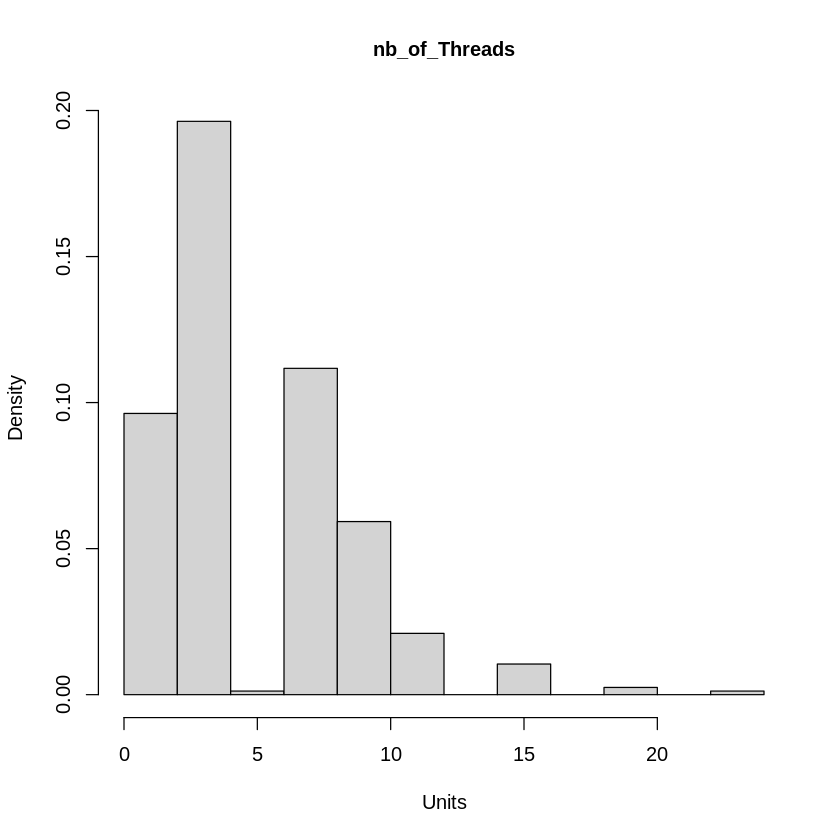

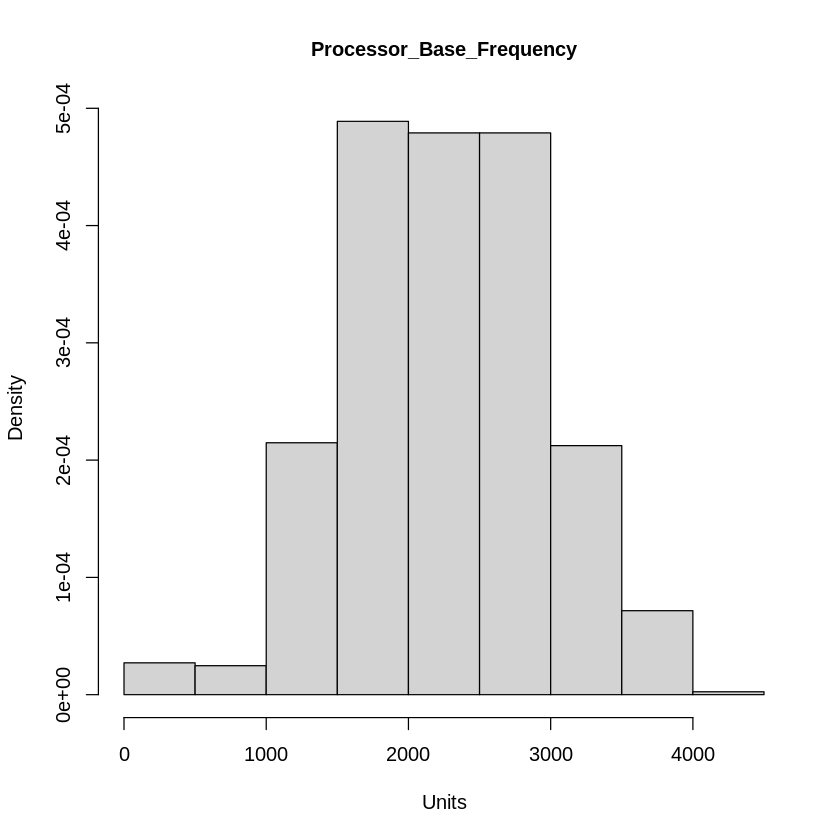

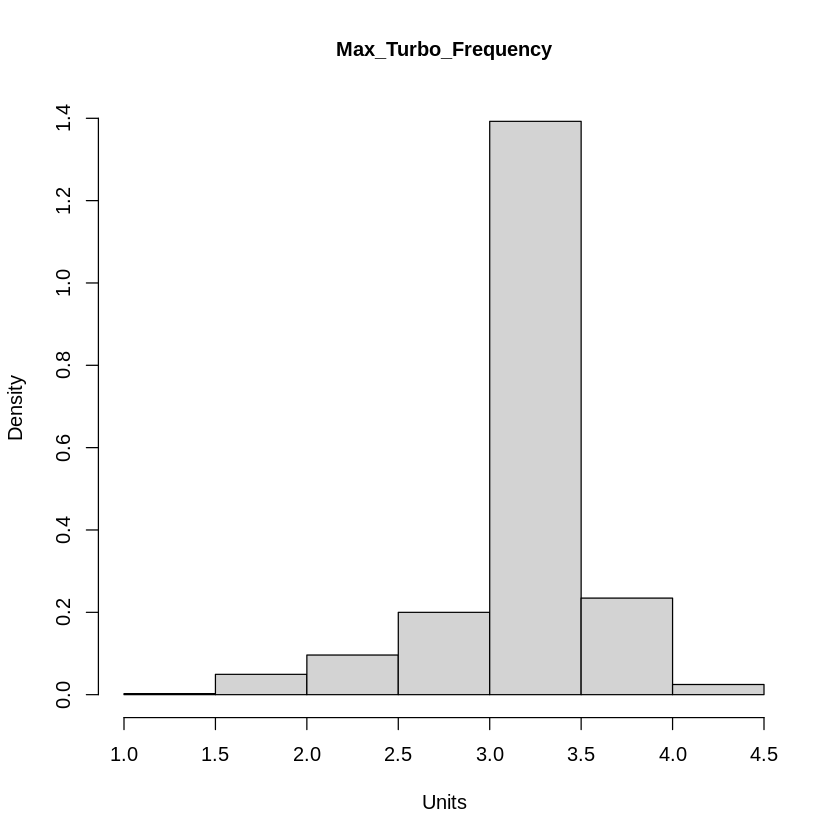

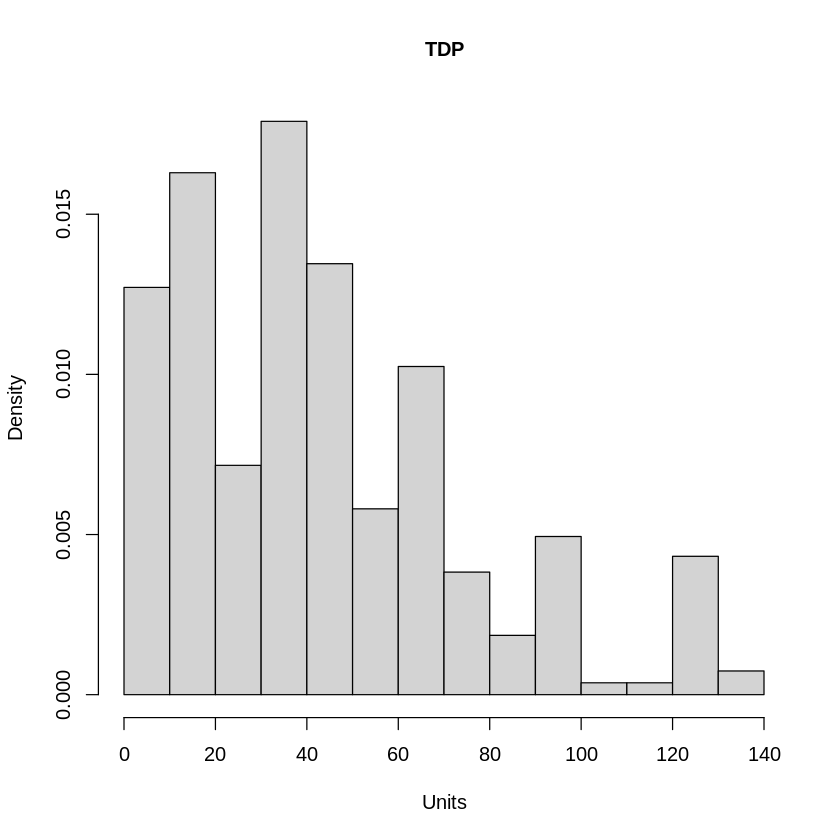

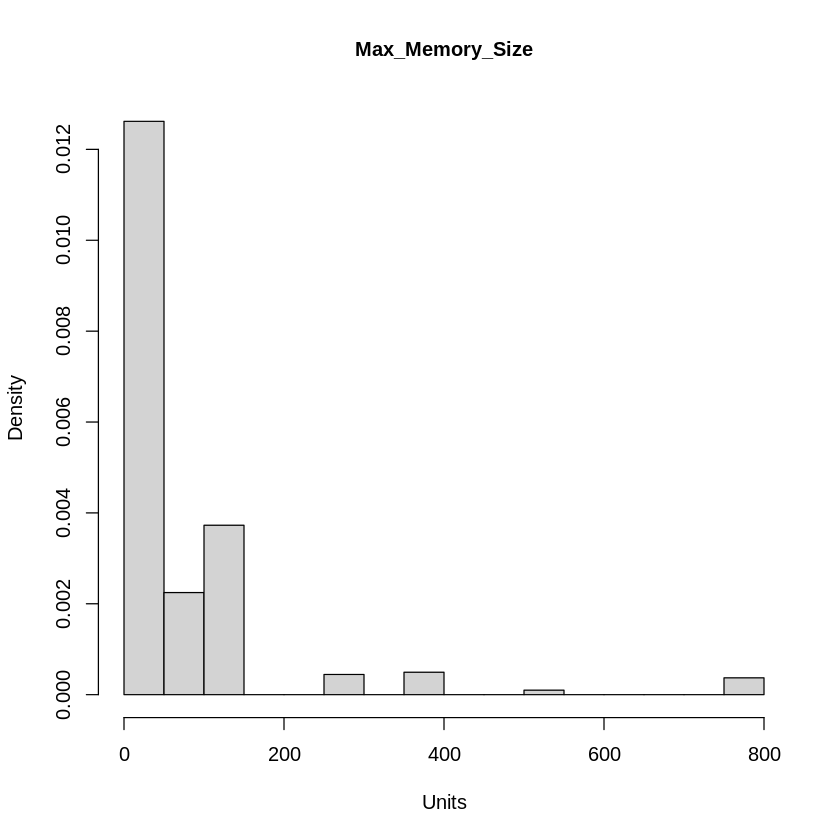

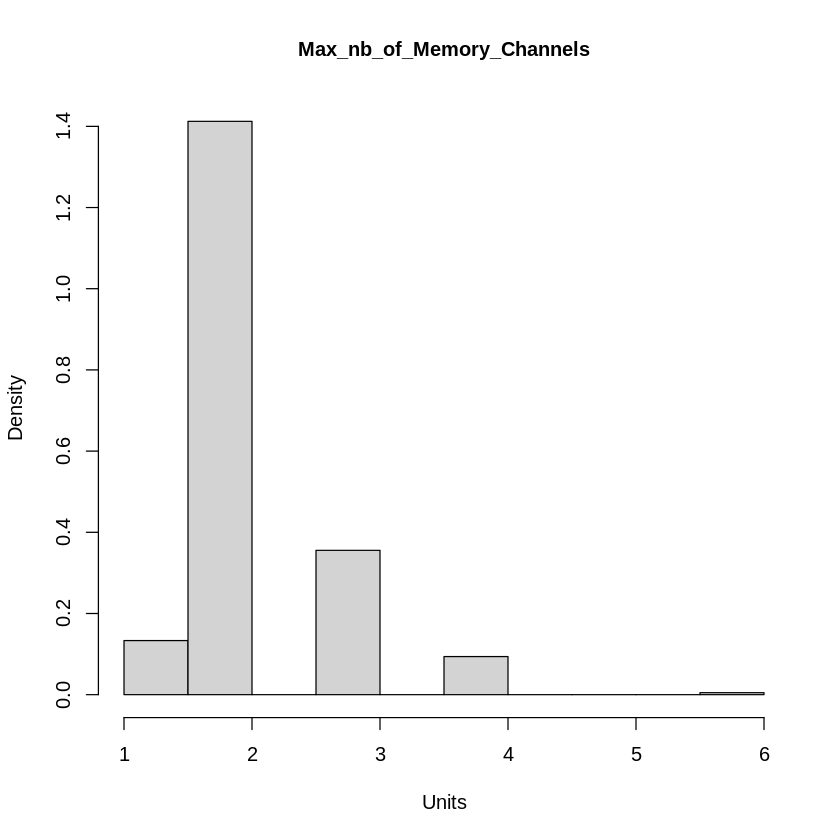

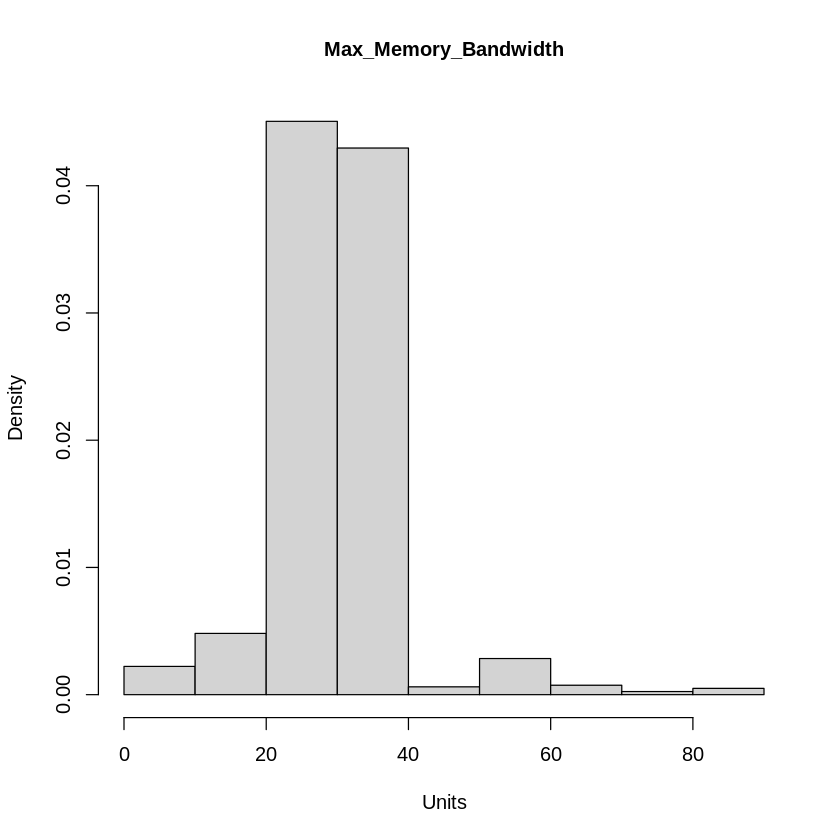

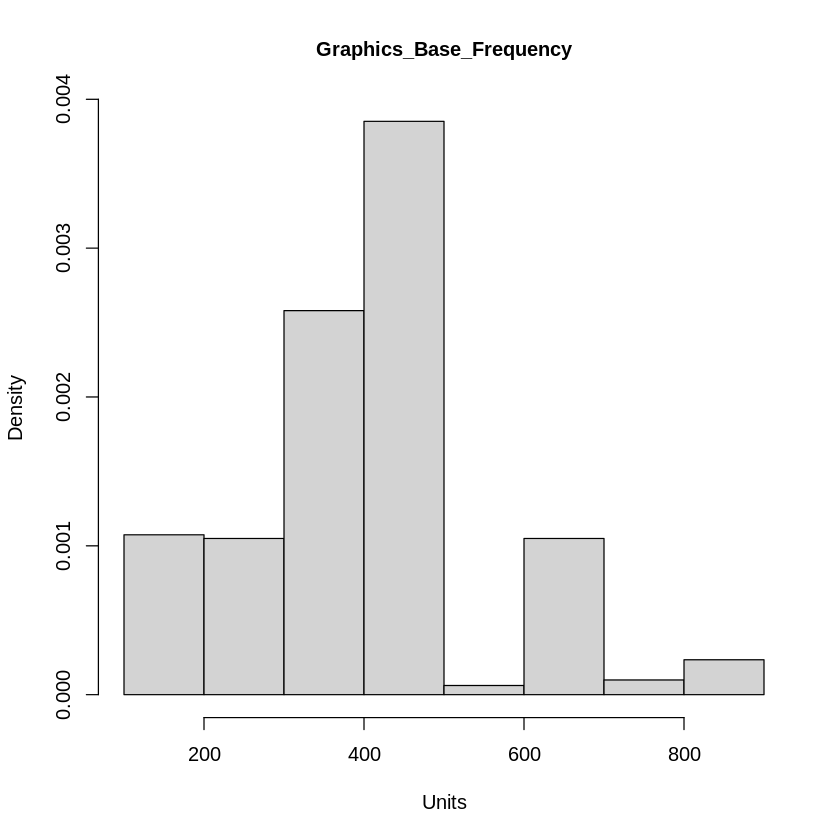

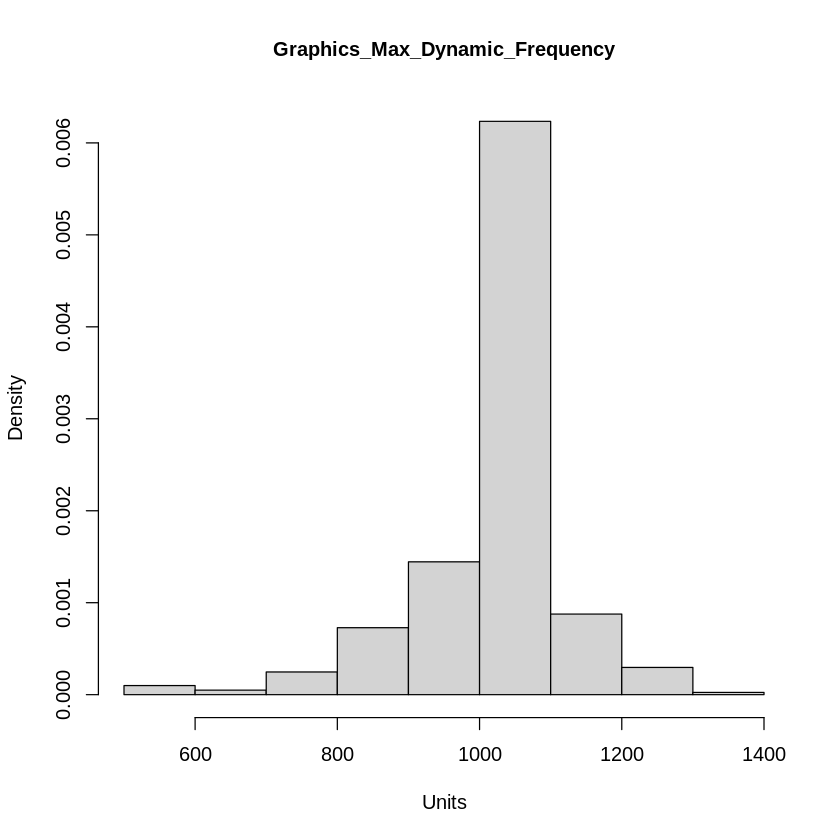

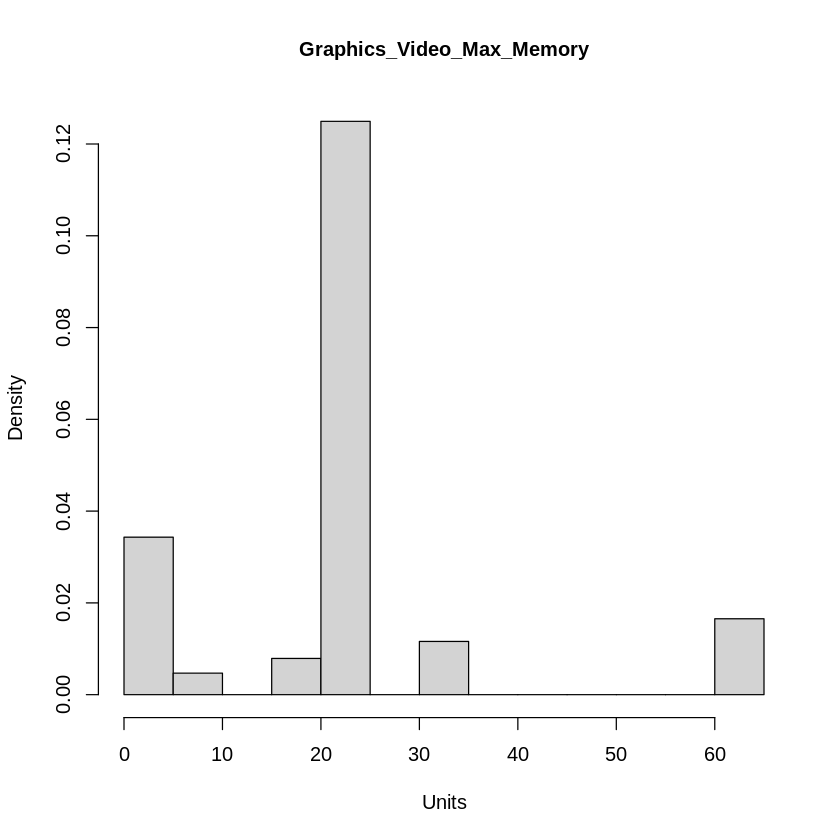

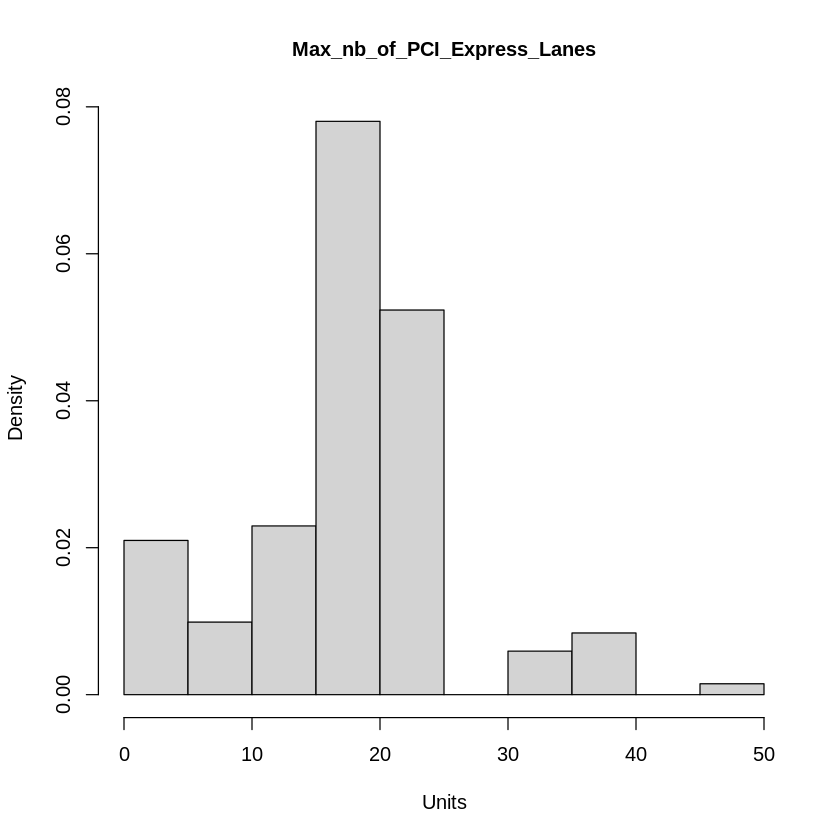

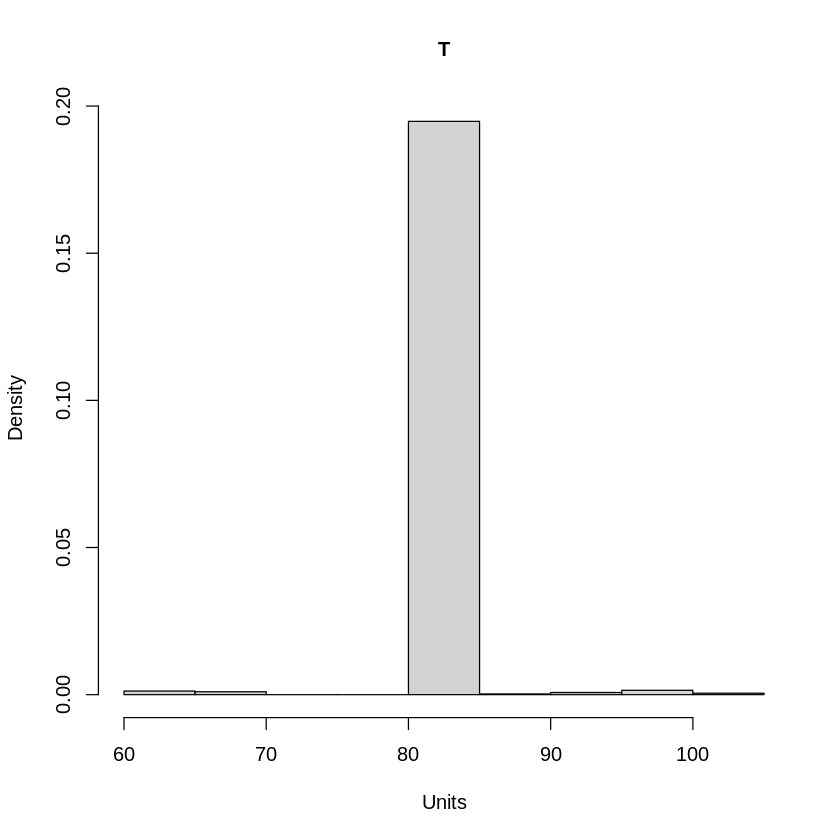

In [ ]:
his = c("Lithography", "Recommended_Customer_Price", "nb_of_Cores", "nb_of_Threads", "Processor_Base_Frequency",
        "Max_Turbo_Frequency", "TDP", "Max_Memory_Size", "Max_nb_of_Memory_Channels", "Max_Memory_Bandwidth",
        "Graphics_Base_Frequency", "Graphics_Max_Dynamic_Frequency", "Graphics_Video_Max_Memory",
        "Max_nb_of_PCI_Express_Lanes", "T")

for (var in his) {
  hist(CPU_train[[var]], main = var, xlab =" Units ", freq = FALSE, cex.main = 1)
}

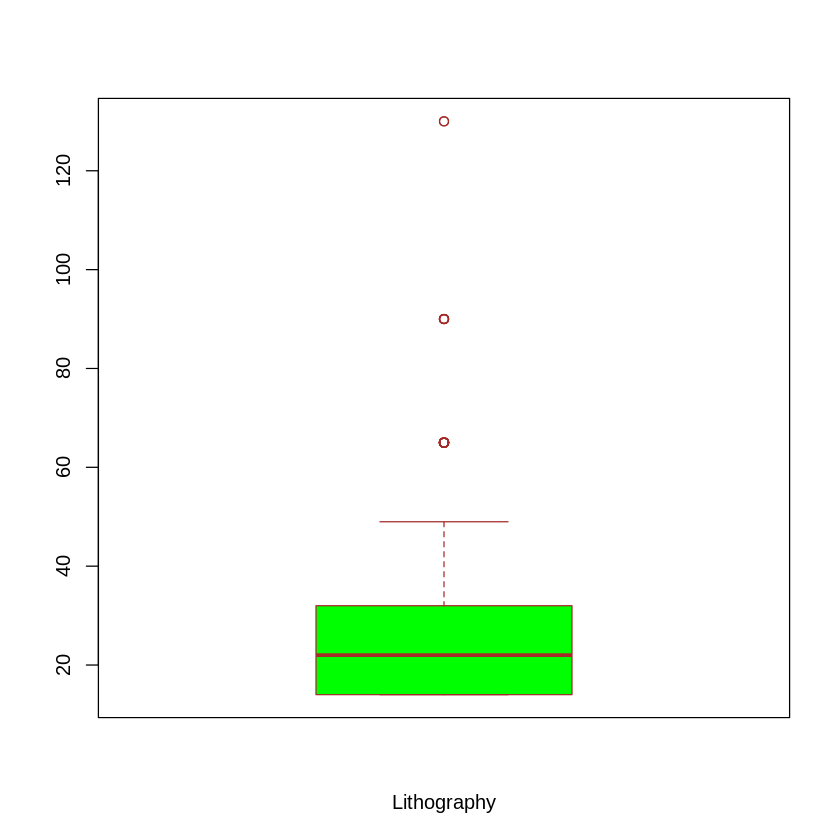

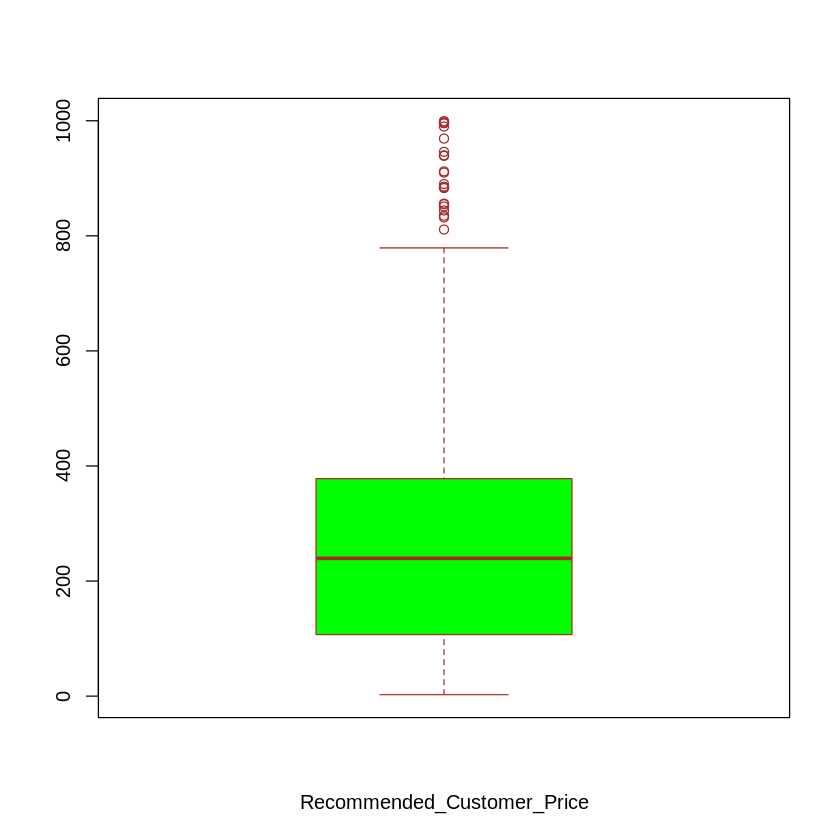

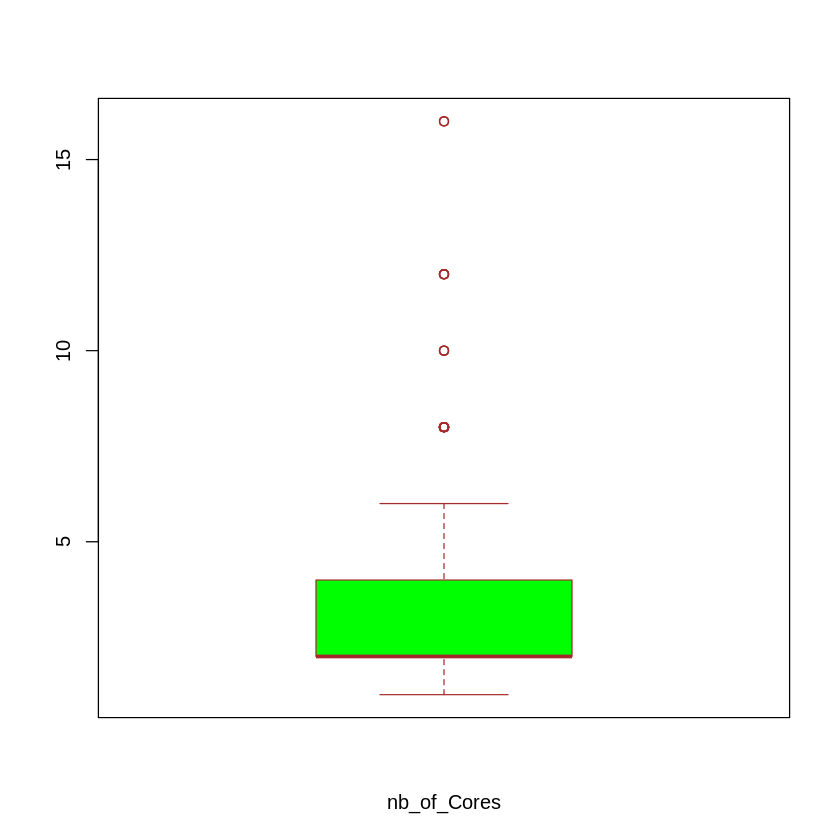

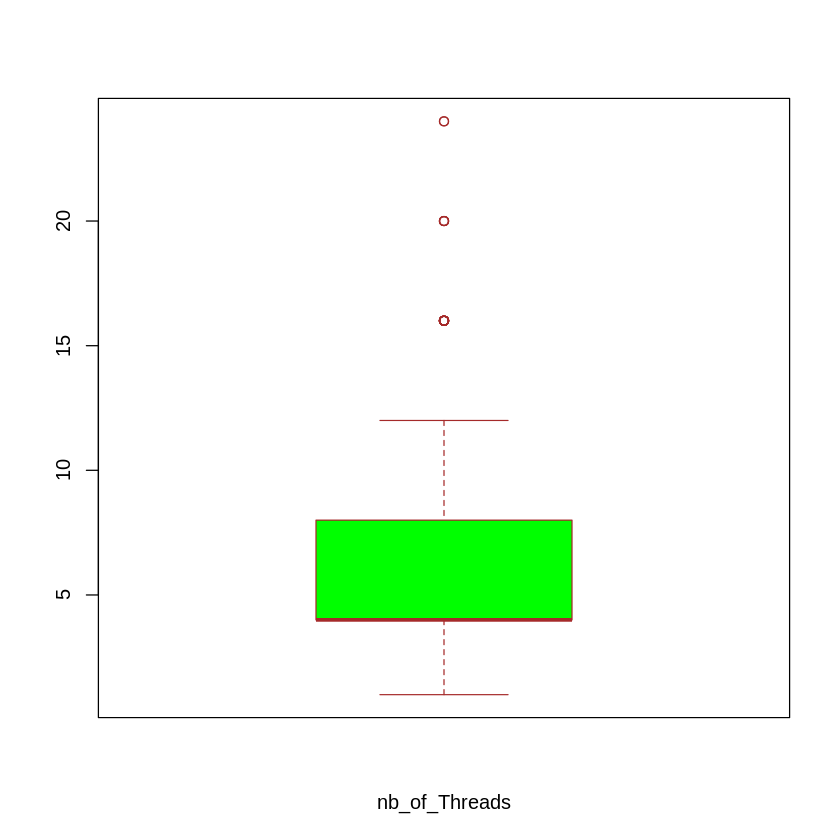

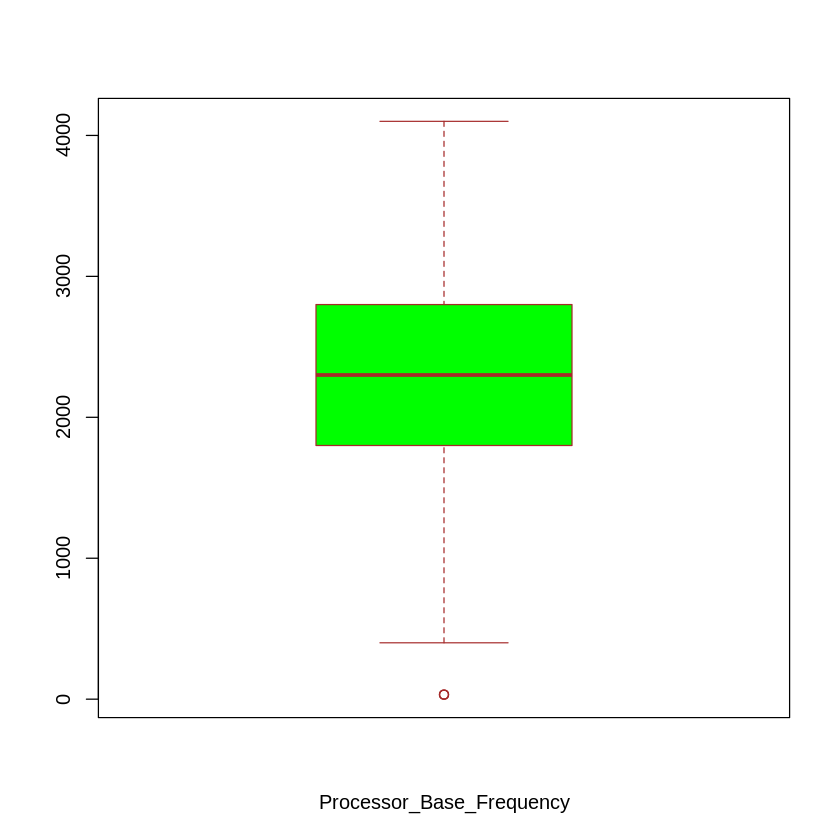

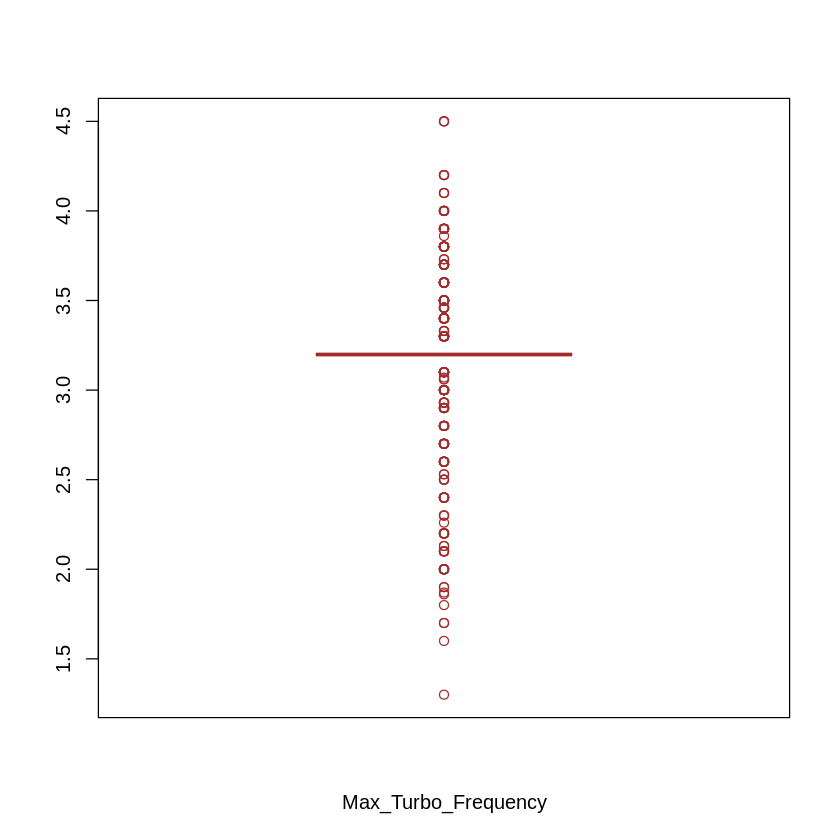

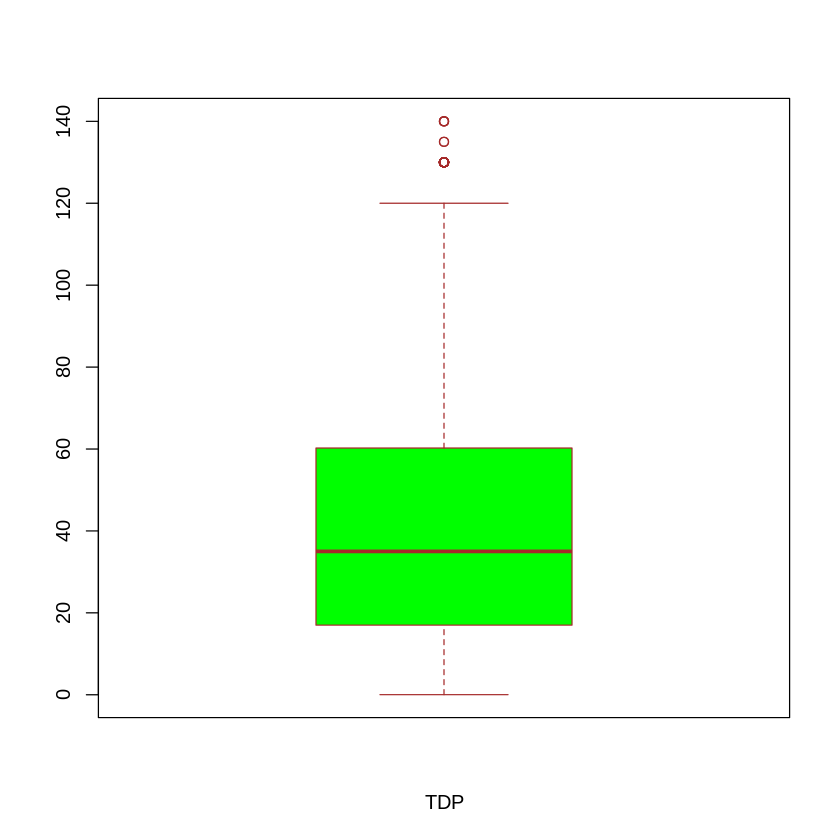

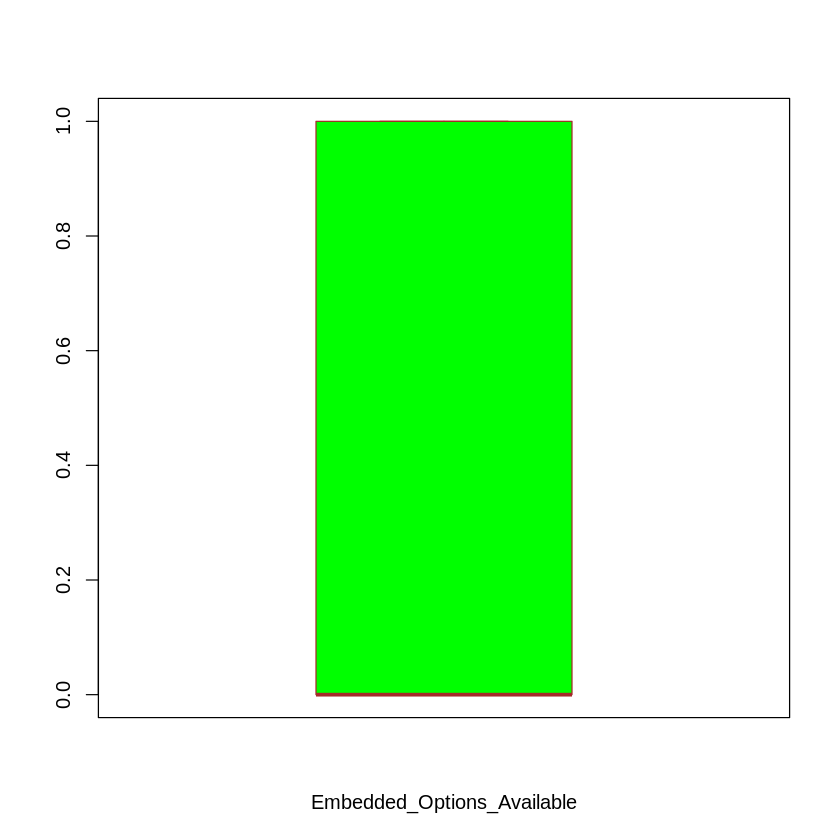

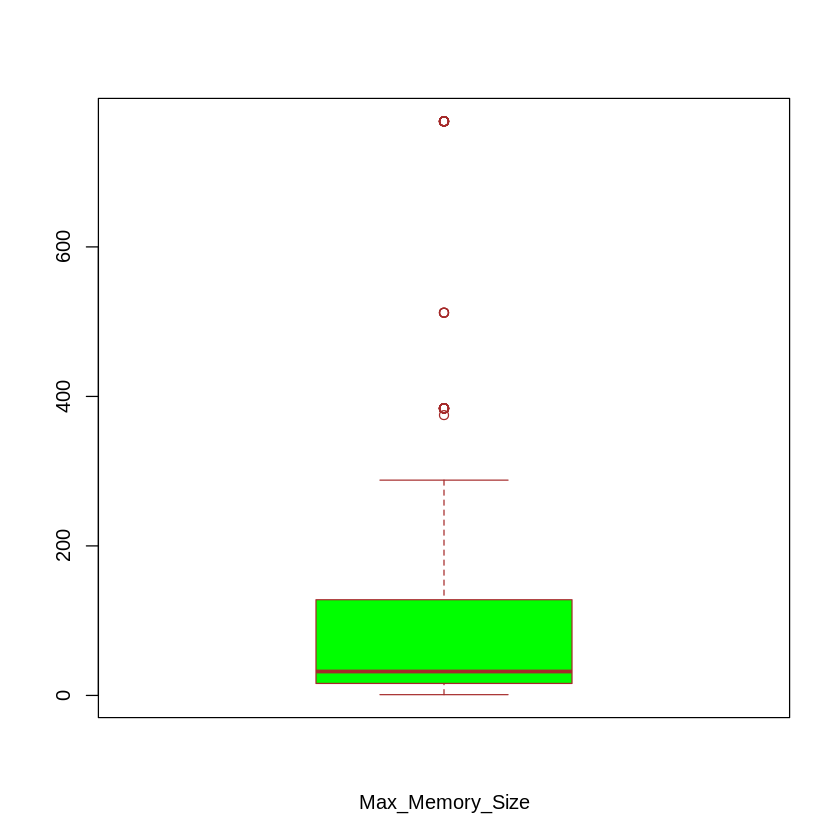

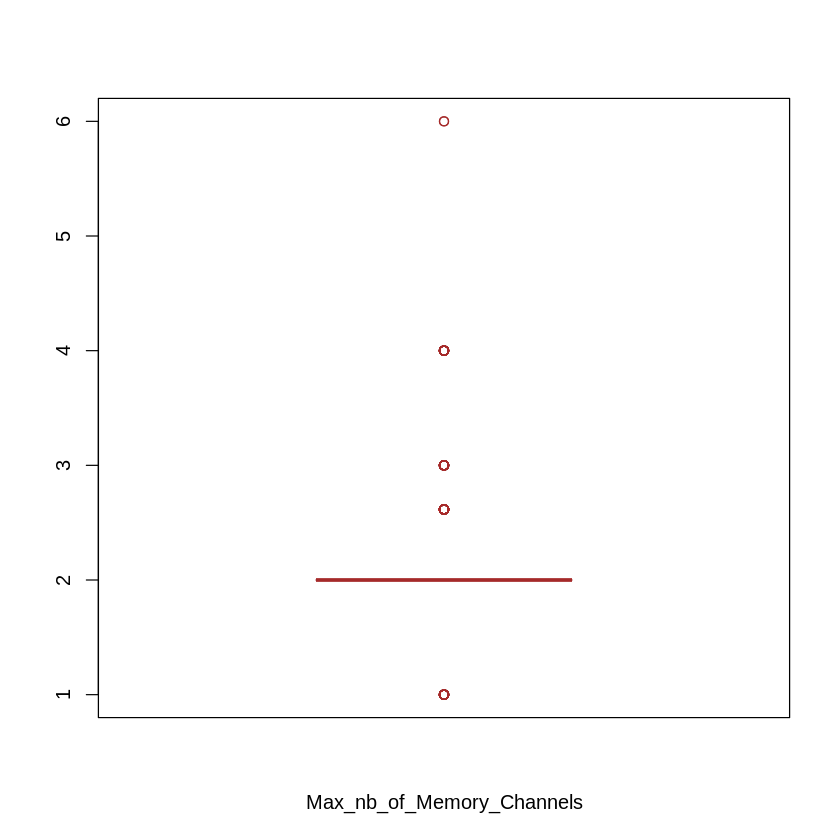

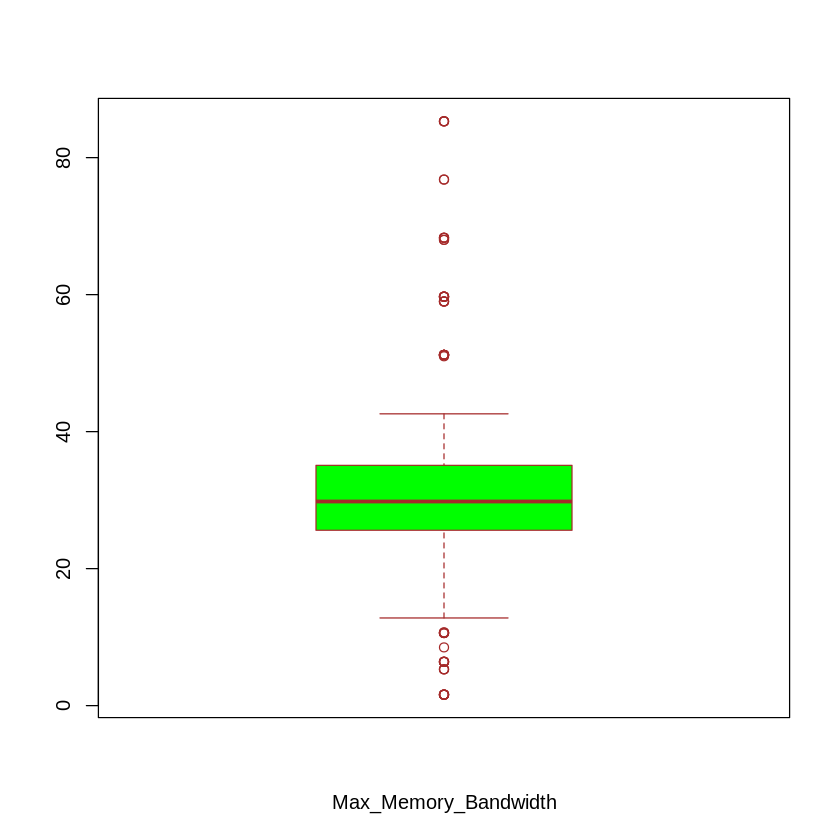

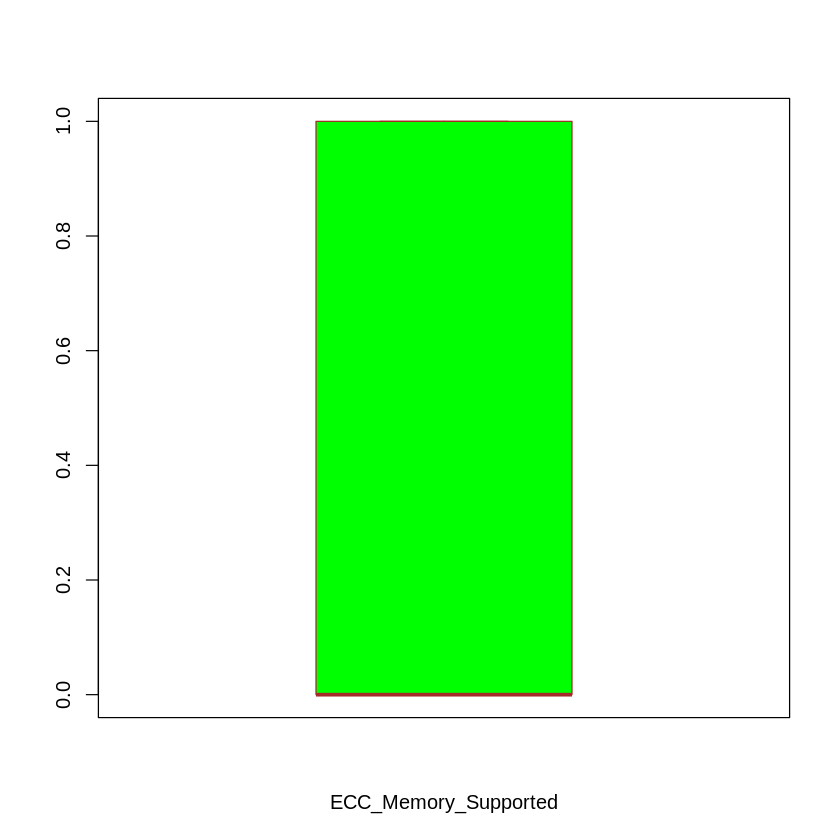

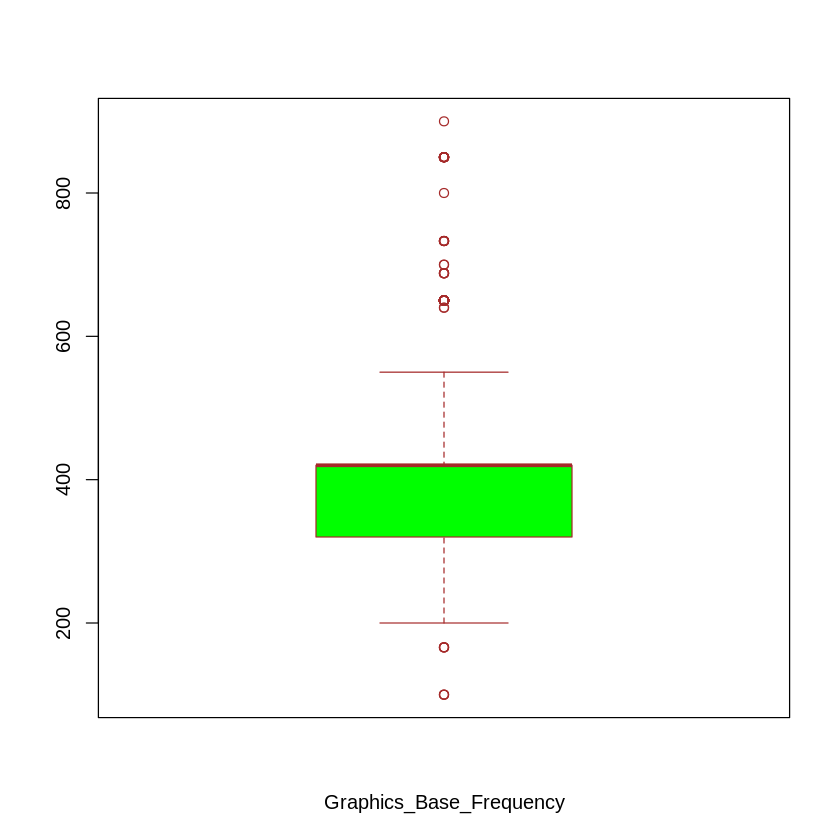

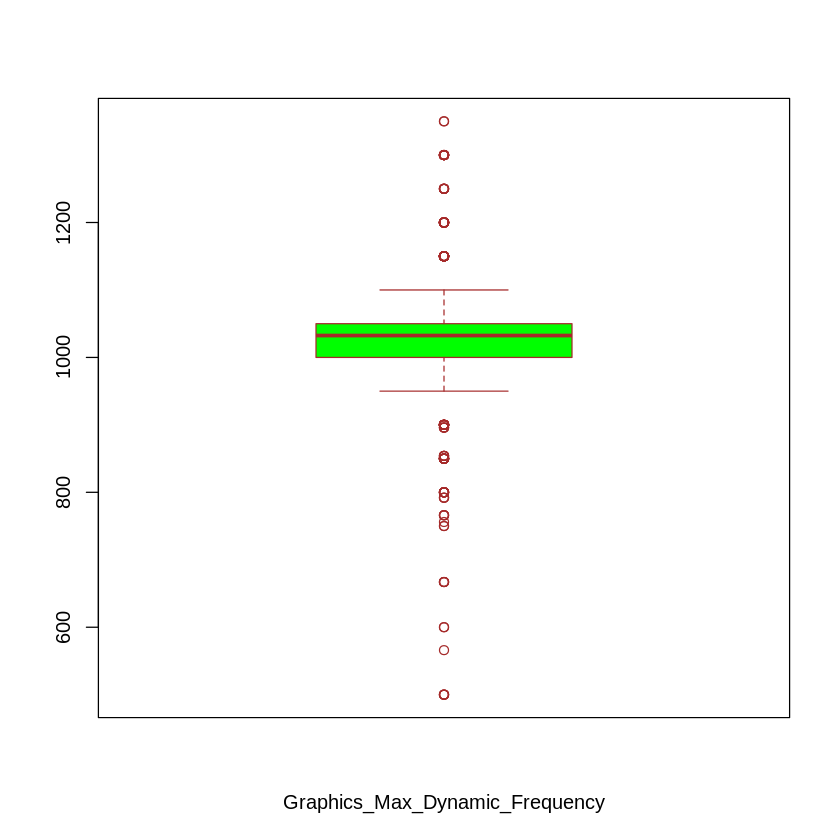

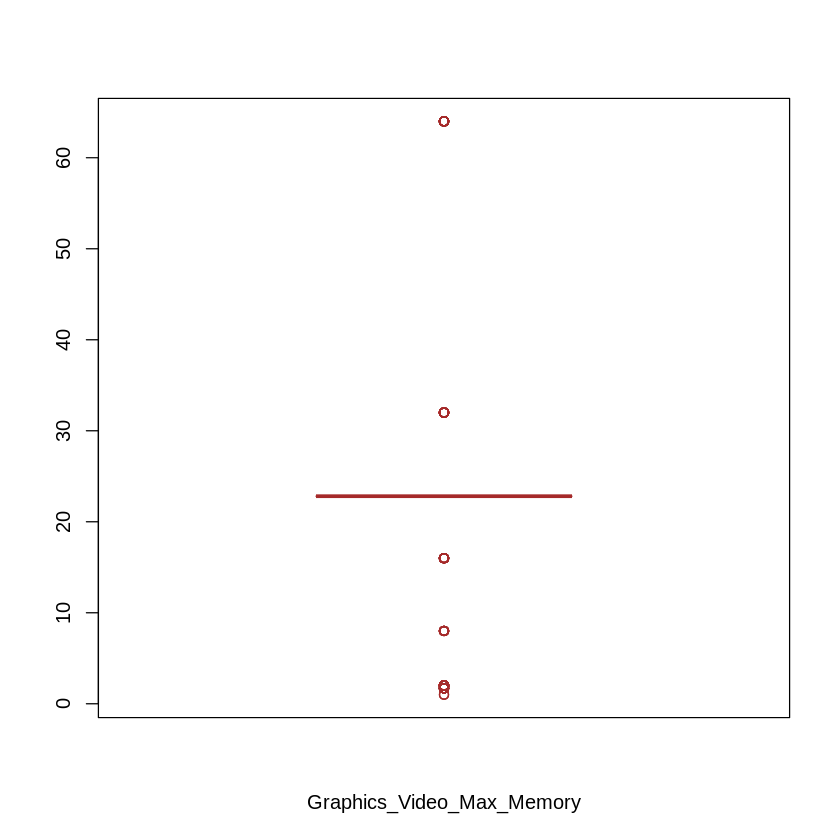

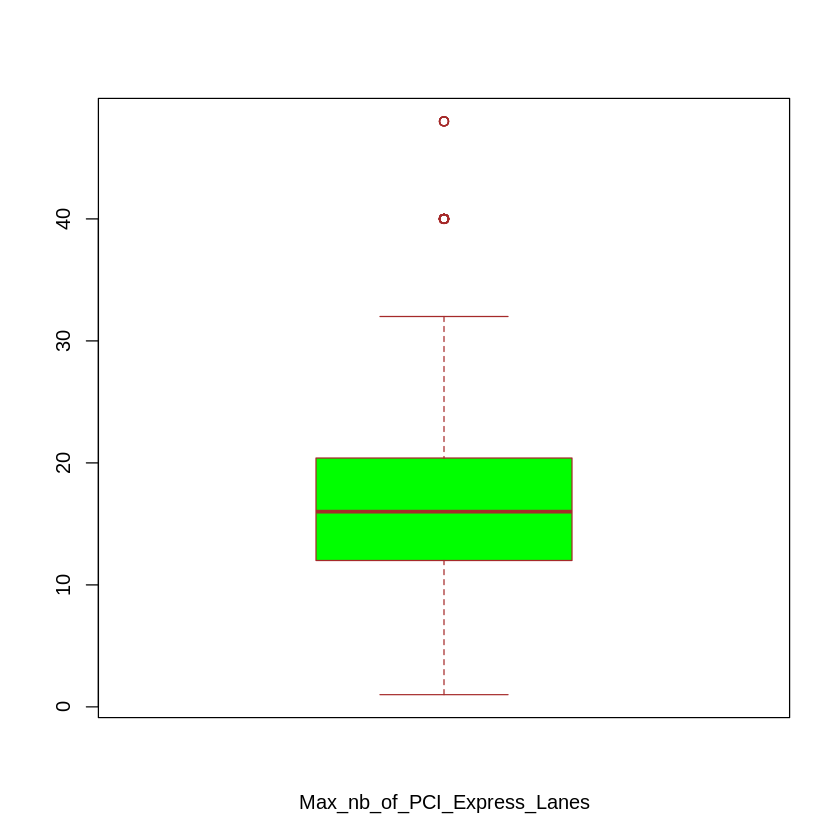

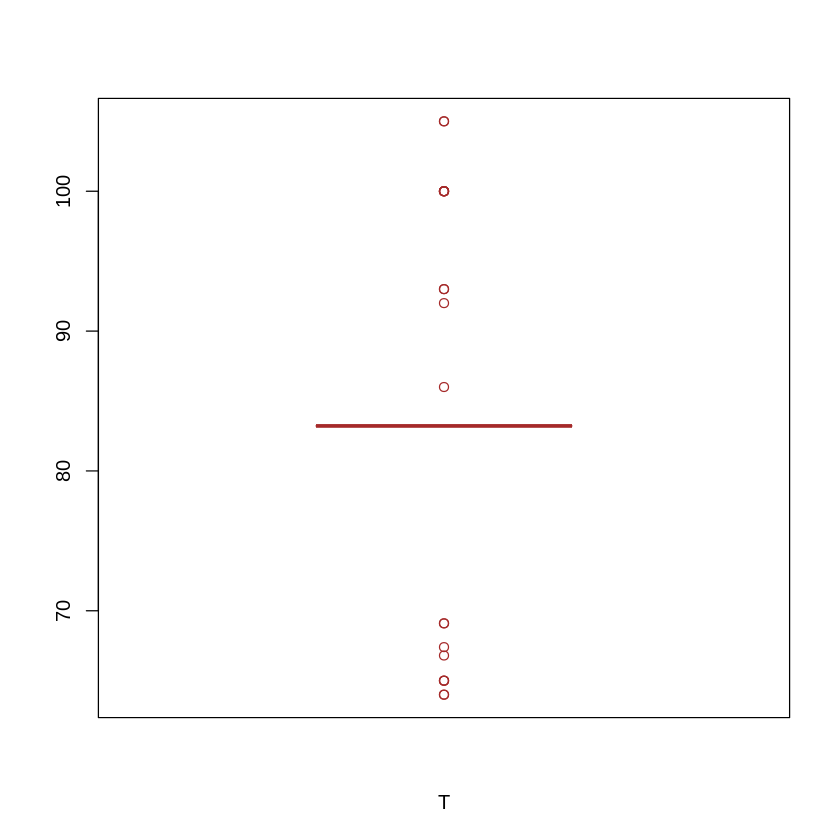

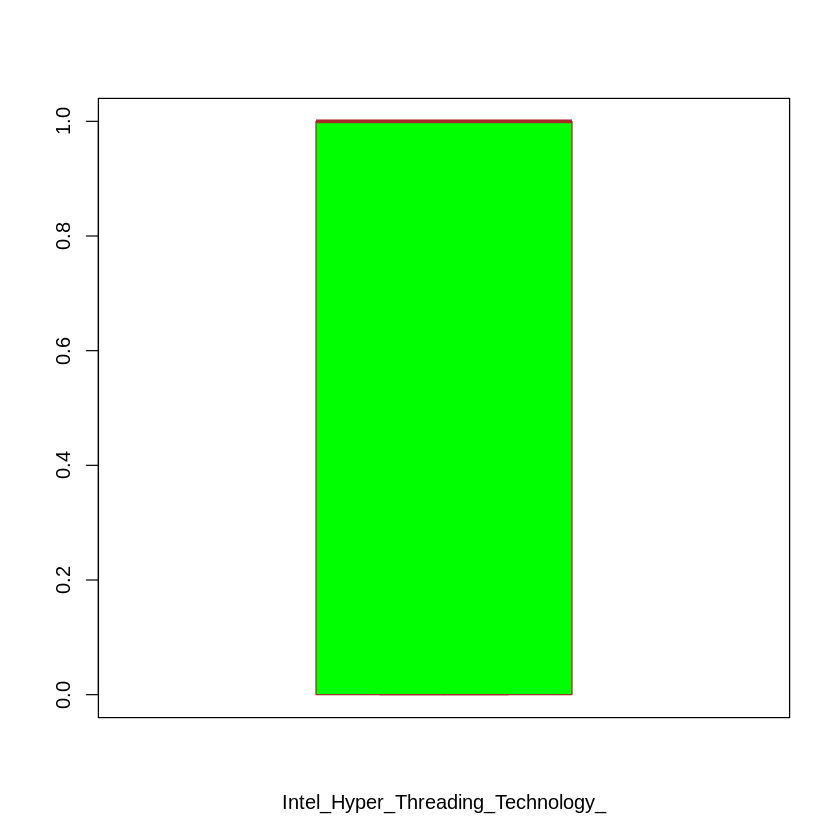

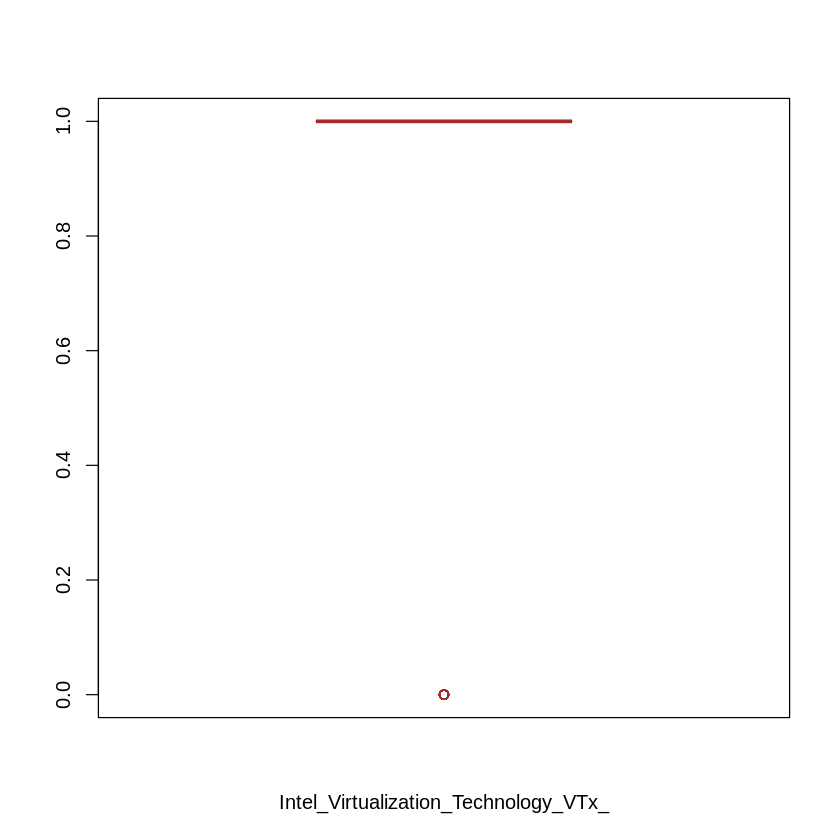

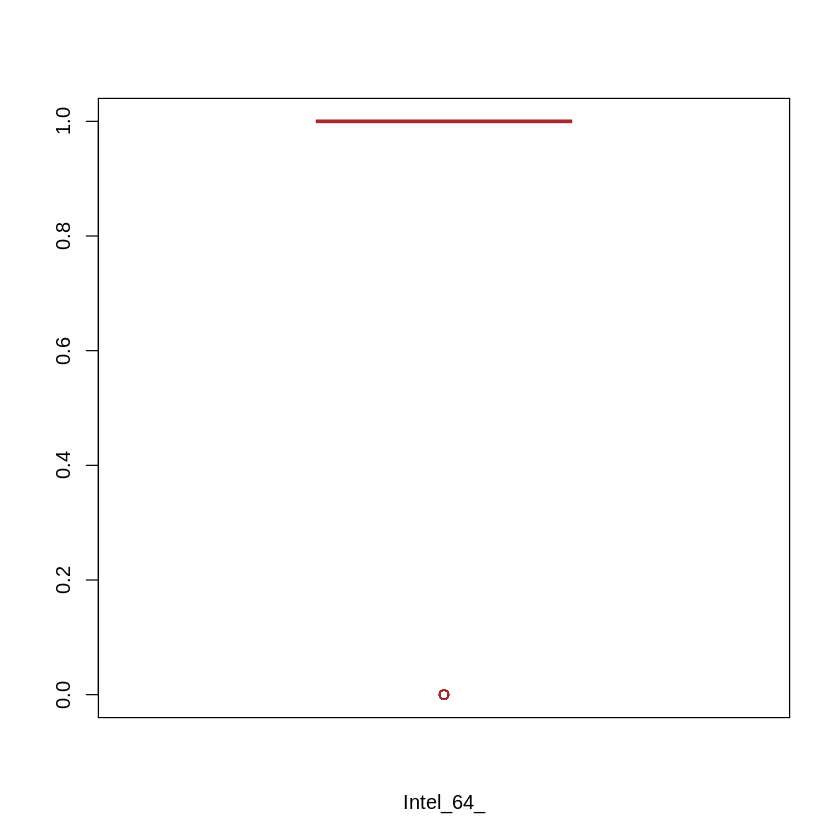

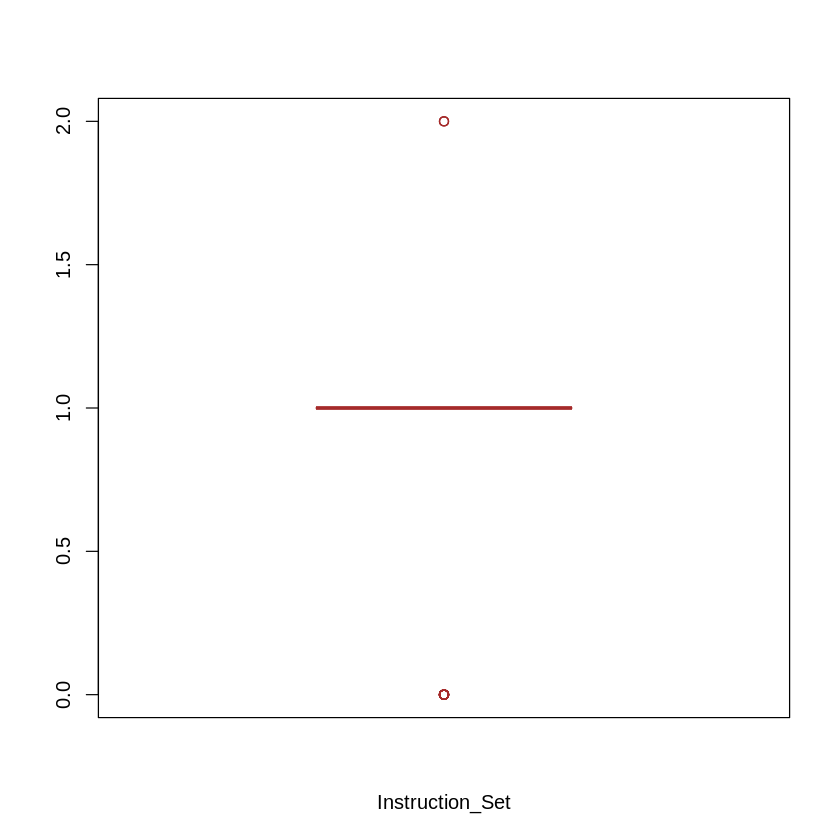

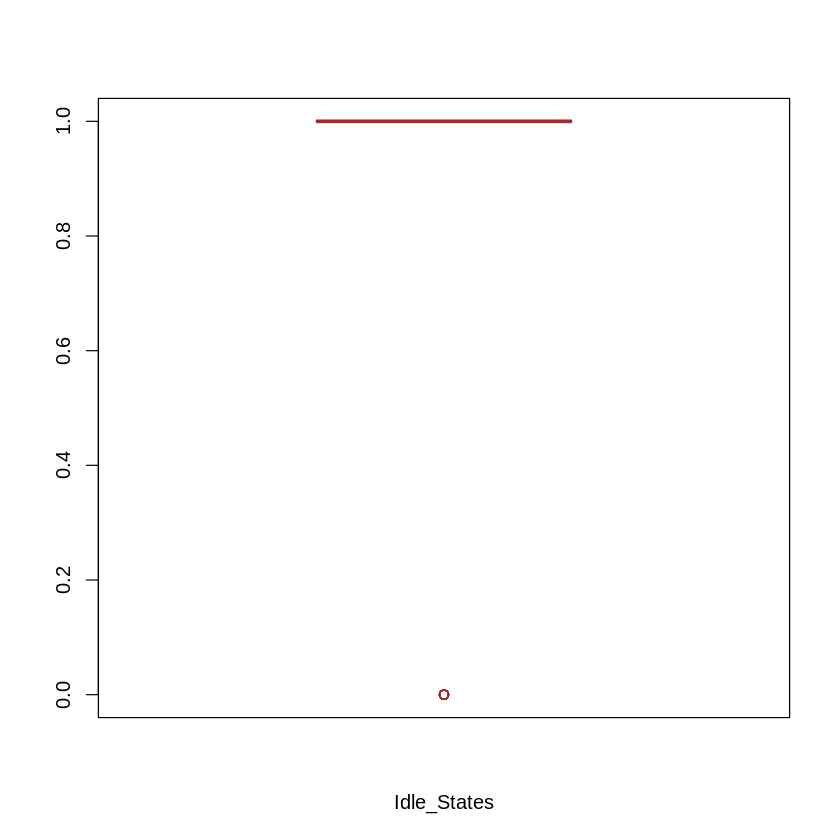

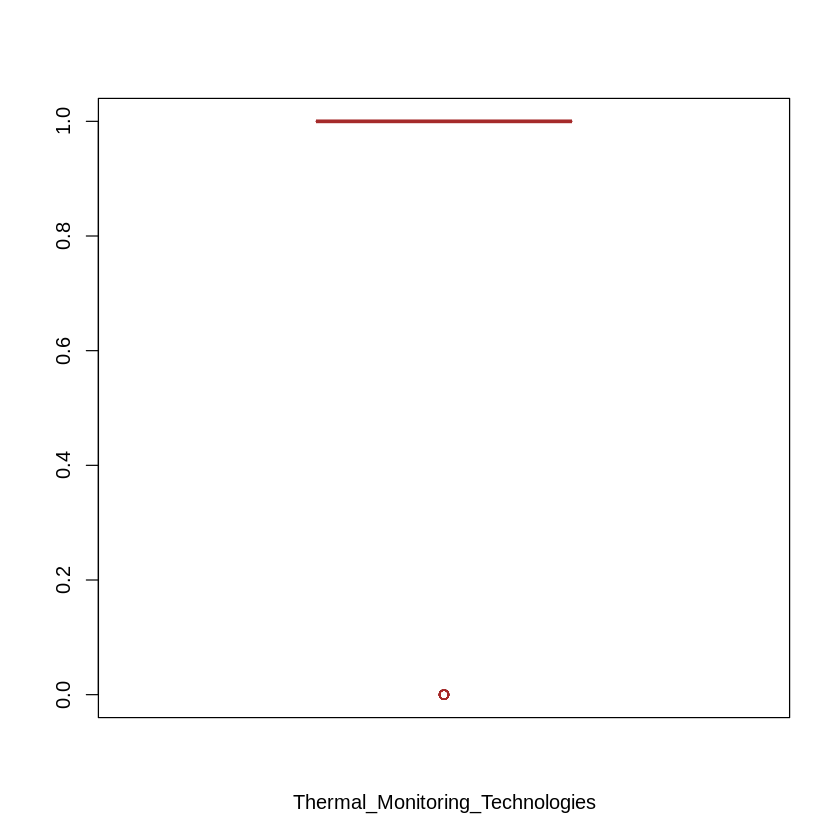

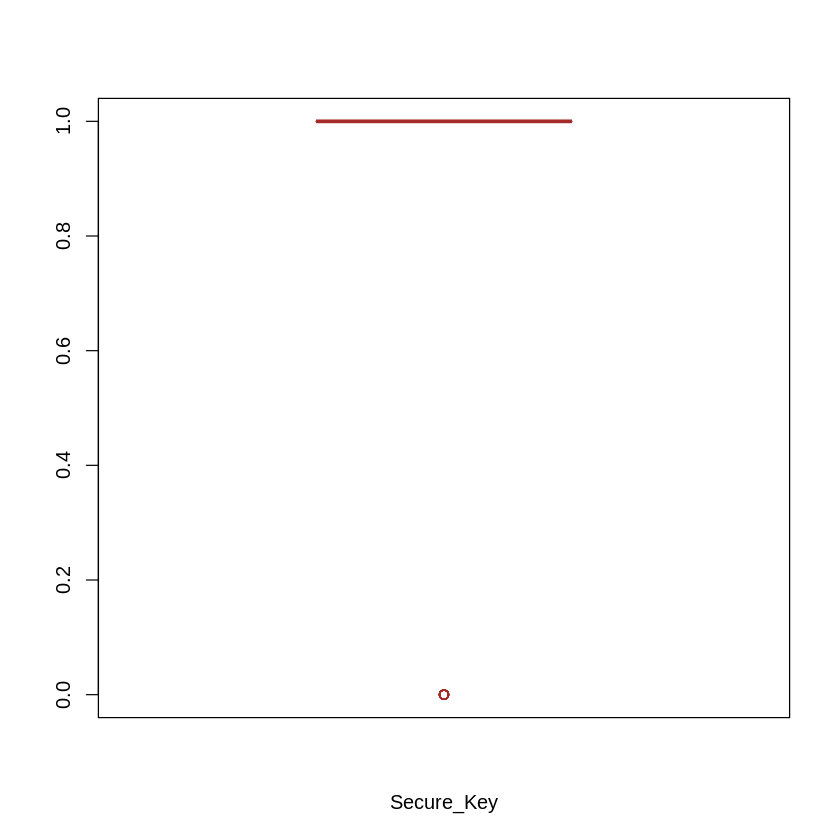

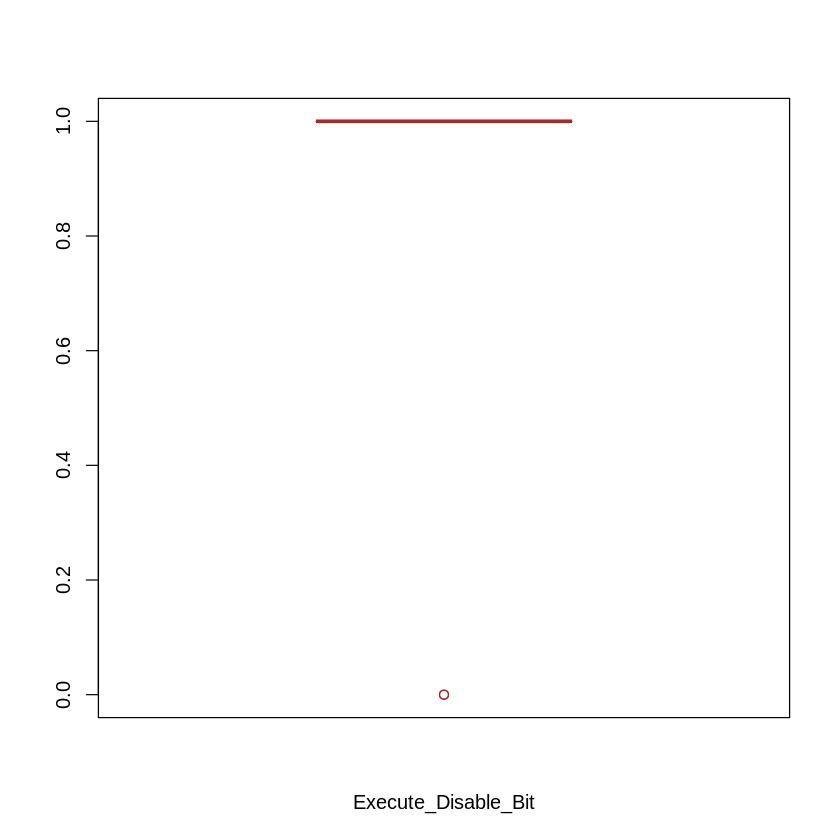

In [ ]:
box <- colnames(CPU_train)
for (var in box) {
  boxplot(CPU_train[[var]],
  col="green",
  xlab = var,
  cex.lab = 1,
  title.cex = 1,
  border = "brown")
}

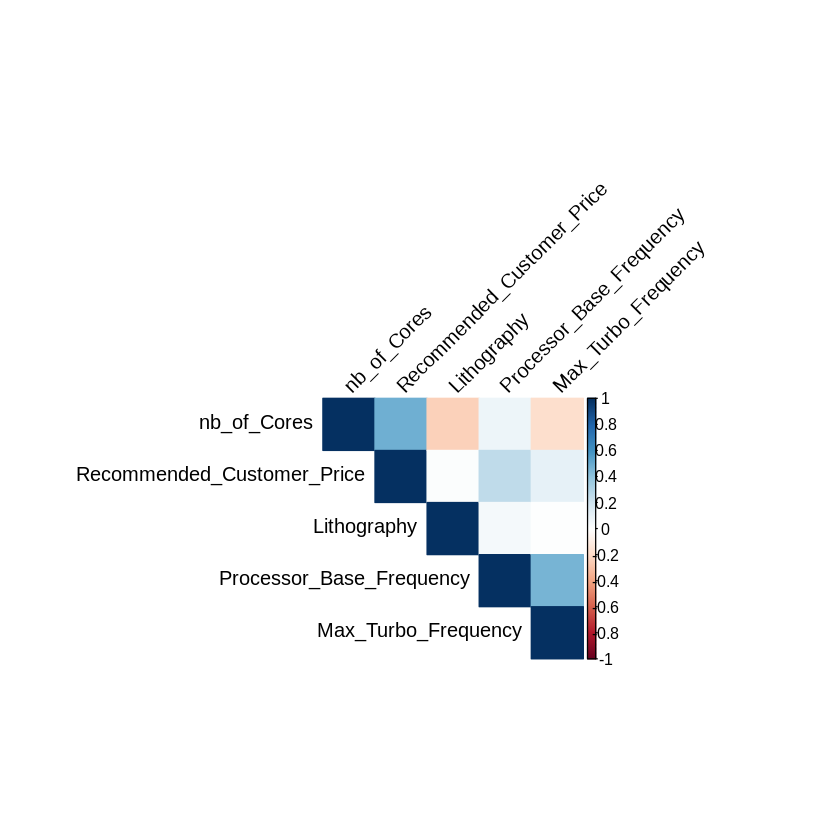

In [ ]:
# Calculate the correlation matrix
select <- c("Processor_Base_Frequency","Lithography","nb_of_Cores","Max_Turbo_Frequency","Recommended_Customer_Price")
correlation_matrix <- cor(CPU_train[select])
# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "upper", order ="hclust", tl.col = "black", tl.srt = 45)

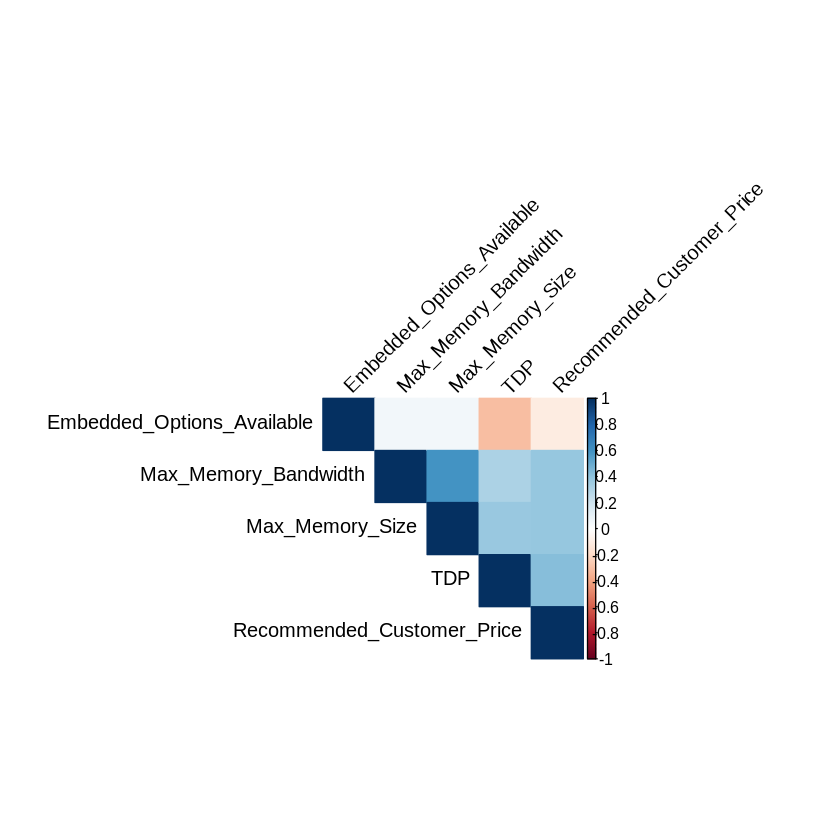

In [ ]:
# Calculate the correlation matrix
select <- c("Max_Memory_Bandwidth", "TDP", "Embedded_Options_Available" ,"Max_Memory_Size" ,"Recommended_Customer_Price")
correlation_matrix <- cor(CPU_train[select])
# Plot the correlation matrix
corrplot (correlation_matrix, method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

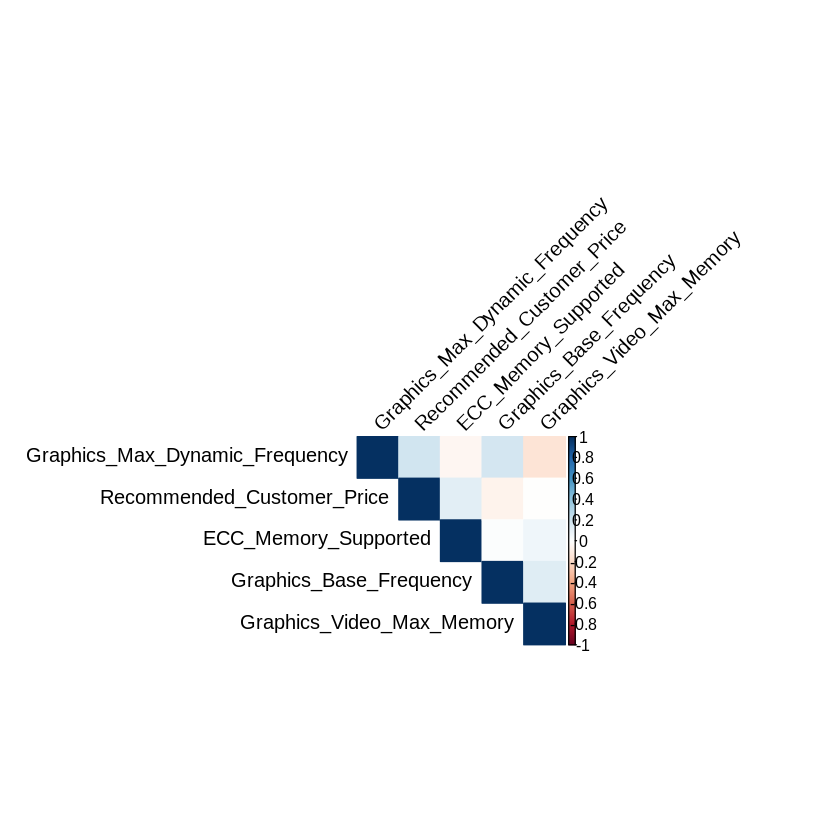

In [ ]:
# Calculate the correlation matrix
select <- c("ECC_Memory_Supported", "Graphics_Base_Frequency", "Graphics_Max_Dynamic_Frequency" ,"Graphics_Video_Max_Memory" ,"Recommended_Customer_Price")
correlation_matrix <- cor(CPU_train[select])
# Plot the correlation matrix
corrplot(correlation_matrix, method = "color", type = "upper", order ="hclust", tl.col = "black", tl.srt = 45)

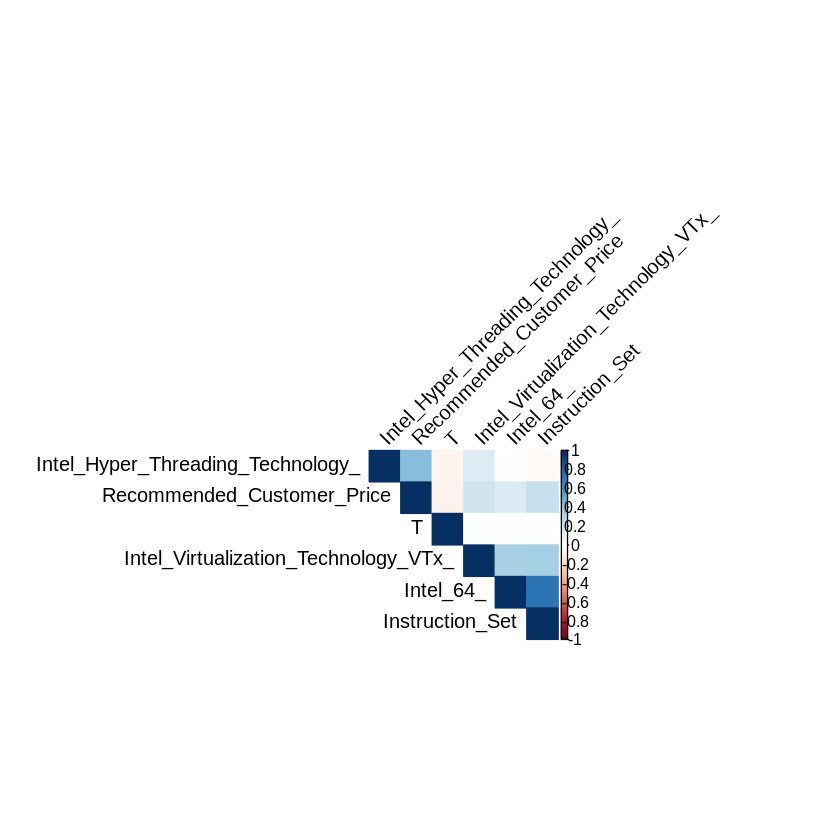

In [ ]:
# Calculate the correlation matrix
select <- c("T" ,"Intel_Hyper_Threading_Technology_" ,"Intel_Virtualization_Technology_VTx_" ,"Intel_64_", "Instruction_Set" ,"Recommended_Customer_Price")
correlation_matrix <- cor(CPU_train[select])
# Plot the correlation matrix
corrplot (correlation_matrix , method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

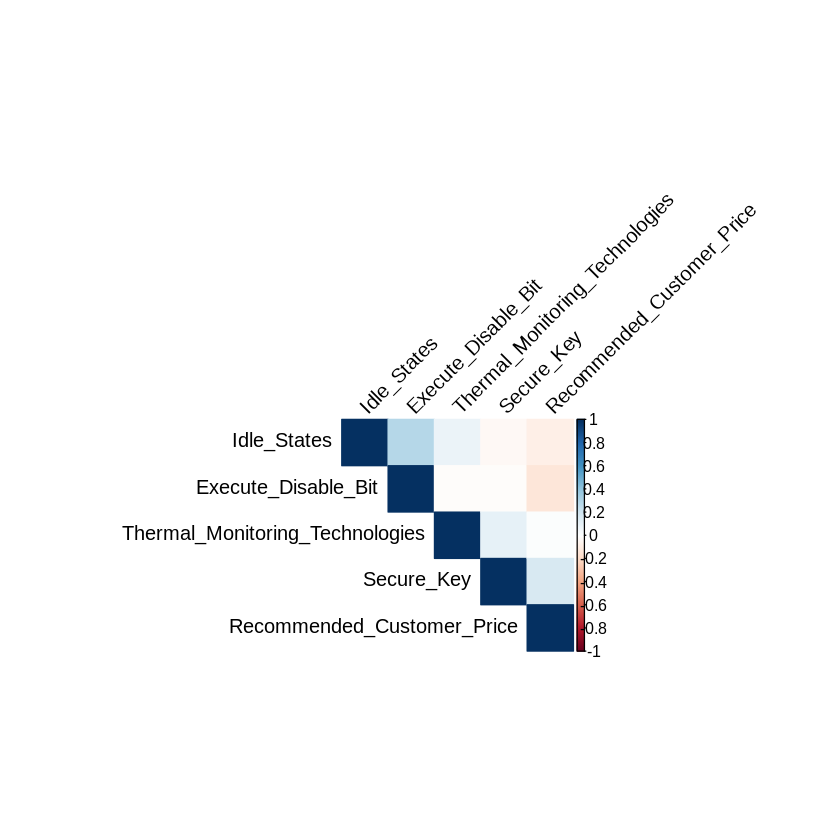

In [ ]:
# Calculate the correlation matrix
select <- c("Idle_States", "Thermal_Monitoring_Technologies", "Secure_Key" , "Execute_Disable_Bit" ,"Recommended_Customer_Price")
correlation_matrix <- cor(CPU_train[select])
# Plot the correlation matrix
corrplot(correlation_matrix , method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

In [ ]:
# Divide CPU_train into train_df and test_df
# Set the seed for reproducibility
set.seed (42)
# Use 70% of dataset as training set and 30% as test set (randomly)
split <- sample.split(CPU_train , SplitRatio = 0.70)
train_df <- subset(CPU_train, split == TRUE)
test_df <- subset(CPU_train, split == FALSE)


In [ ]:
# MLR
# Fitting MLR model
model_mlr <- lm(Recommended_Customer_Price ~ ., data = train_df)
summary(model_mlr)



Call:
lm(formula = Recommended_Customer_Price ~ ., data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.20  -74.27   -3.34   60.31  650.60 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -435.30912  277.87448  -1.567 0.117816    
Lithography                             1.86791    0.68267   2.736 0.006426 ** 
nb_of_Cores                            11.59640    6.78604   1.709 0.088065 .  
nb_of_Threads                          21.89689    3.90409   5.609 3.29e-08 ***
Processor_Base_Frequency               -0.01873    0.01374  -1.363 0.173450    
Max_Turbo_Frequency                    52.55787   17.92416   2.932 0.003512 ** 
TDP                                     0.63478    0.38478   1.650 0.099596 .  
Embedded_Options_Available              7.81178   15.16417   0.515 0.606666    
Max_Memory_Size                         0.22419    0.07634   2.937 0.003464 ** 
Max_nb_of_Memory_Chann

In [ ]:
# Stepwise regression
# Fitting Stepwise Regression model
model_sw <- stepAIC(model_mlr, direction = "both")
summary(model_sw)

Start:  AIC=5365.76
Recommended_Customer_Price ~ Lithography + nb_of_Cores + nb_of_Threads + 
    Processor_Base_Frequency + Max_Turbo_Frequency + TDP + Embedded_Options_Available + 
    Max_Memory_Size + Max_nb_of_Memory_Channels + Max_Memory_Bandwidth + 
    ECC_Memory_Supported + Graphics_Base_Frequency + Graphics_Max_Dynamic_Frequency + 
    Graphics_Video_Max_Memory + Max_nb_of_PCI_Express_Lanes + 
    T + Intel_Hyper_Threading_Technology_ + Intel_Virtualization_Technology_VTx_ + 
    Intel_64_ + Instruction_Set + Idle_States + Thermal_Monitoring_Technologies + 
    Secure_Key + Execute_Disable_Bit

                                       Df Sum of Sq      RSS    AIC
- Max_Memory_Bandwidth                  1        40  8398343 5363.8
- Thermal_Monitoring_Technologies       1       393  8398697 5363.8
- T                                     1       414  8398717 5363.8
- Intel_64_                             1      1589  8399893 5363.9
- Graphics_Video_Max_Memory             1      2


Call:
lm(formula = Recommended_Customer_Price ~ Lithography + nb_of_Cores + 
    nb_of_Threads + Max_Turbo_Frequency + Max_Memory_Size + Max_nb_of_Memory_Channels + 
    Graphics_Base_Frequency + Graphics_Max_Dynamic_Frequency + 
    Max_nb_of_PCI_Express_Lanes + Intel_Hyper_Threading_Technology_ + 
    Intel_Virtualization_Technology_VTx_ + Instruction_Set + 
    Idle_States + Execute_Disable_Bit, data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.95  -75.14   -3.72   58.33  643.28 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -414.42469  133.30254  -3.109 0.001977 ** 
Lithography                             2.30075    0.54367   4.232 2.73e-05 ***
nb_of_Cores                            17.48242    5.89614   2.965 0.003161 ** 
nb_of_Threads                          19.84871    3.56152   5.573 3.97e-08 ***
Max_Turbo_Frequency                    52.47405   15.05196   3.486 0.00

In [ ]:
# 2-way ANOVA
multiAnova <- aov(Recommended_Customer_Price ~ Lithography + nb_of_Cores
                  + Max_Turbo_Frequency + TDP + Max_Memory_Size + Max_Memory_Bandwidth
                  + Graphics_Base_Frequency + Graphics_Max_Dynamic_Frequency
                  + Graphics_Video_Max_Memory + T + Intel_Hyper_Threading_Technology_
                  + Intel_Virtualization_Technology_VTx_
                  + Intel_64_ + Instruction_Set + Idle_States
                  , data = train_df)
summary(multiAnova)

                                      Df  Sum Sq Mean Sq F value   Pr(>F)    
Lithography                            1   76858   76858   4.431  0.03575 *  
nb_of_Cores                            1 6437494 6437494 371.161  < 2e-16 ***
Max_Turbo_Frequency                    1  993666  993666  57.291 1.65e-13 ***
TDP                                    1  728297  728297  41.991 2.08e-10 ***
Max_Memory_Size                        1  531646  531646  30.653 4.84e-08 ***
Max_Memory_Bandwidth                   1  206694  206694  11.917  0.00060 ***
Graphics_Base_Frequency                1  456508  456508  26.321 4.05e-07 ***
Graphics_Max_Dynamic_Frequency         1  173062  173062   9.978  0.00167 ** 
Graphics_Video_Max_Memory              1   13349   13349   0.770  0.38071    
T                                      1   56776   56776   3.273  0.07097 .  
Intel_Hyper_Threading_Technology_      1 3590745 3590745 207.029  < 2e-16 ***
Intel_Virtualization_Technology_VTx_   1  487859  487859  28.128

In [ ]:
# Check whether the distribution is normal
av_residual = rstandard(aov(Recommended_Customer_Price ~.,data =CPU_train))
shapiro.test(av_residual)


	Shapiro-Wilk normality test

data:  av_residual
W = 0.9371, p-value < 2.2e-16


In [ ]:
# Decision trees
library(rpart)
model_dt <- rpart(Recommended_Customer_Price ~ ., data = train_df)
summary(model_dt)


Call:
rpart(formula = Recommended_Customer_Price ~ ., data = train_df)
  n= 552 

           CP nsplit rel error    xerror       xstd
1  0.32476374      0 1.0000000 1.0019429 0.08130979
2  0.10482911      1 0.6752363 0.6794778 0.05779750
3  0.06479055      2 0.5704072 0.5763951 0.05264067
4  0.05392032      3 0.5056166 0.5157224 0.05000730
5  0.03684444      4 0.4516963 0.4678845 0.04934698
6  0.02927598      5 0.4148518 0.4395142 0.04776611
7  0.02429200      6 0.3855759 0.4250011 0.04811594
8  0.01445573      7 0.3612839 0.4099342 0.04665094
9  0.01373355      8 0.3468281 0.3994824 0.04718390
10 0.01180496      9 0.3330946 0.3902538 0.04629981
11 0.01000000     10 0.3212896 0.3878753 0.04626448

Variable importance
                       nb_of_Threads                          nb_of_Cores 
                                  22                                   14 
                     Max_Memory_Size                                  TDP 
                                  13            

In [ ]:
install.packages("randomForest",type="source")
library(randomForest)
model_rf <- randomForest(Recommended_Customer_Price ~ ., data = train_df)
summary(model_rf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




                Length Class  Mode     
call              3    -none- call     
type              1    -none- character
predicted       552    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       552    -none- numeric  
importance       24    -none- numeric  
importanceSD      0    -none- NULL     
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               552    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

In [ ]:
anova(model_mlr,model_sw)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,527,8398303,NA,NA,NA,NA
2,537,8485591,-10,-87287.93,0.5477385,0.8561118


In [ ]:
# Ensure all models are trained on the same dataset
common_training_data <- train_df

# Fit MLR model
model_mlr <- lm(Recommended_Customer_Price ~ ., data = common_training_data)

# Fit Stepwise model (assuming you already have the stepwise model)
model_sw <- step(lm(Recommended_Customer_Price ~ ., data = common_training_data))

# Fit Decision Tree model
model_dt <- rpart(Recommended_Customer_Price ~ ., data = common_training_data)

# Fit Random Forest model
model_rf <- randomForest(Recommended_Customer_Price ~ ., data = common_training_data)

# Predictions on test data
pred_mlr <- predict(model_mlr, newdata = test_df)
pred_sw <- predict(model_sw, newdata = test_df)
pred_dt <- predict(model_dt, newdata = test_df)
pred_rf <- predict(model_rf, newdata = test_df)

# Calculate MSE for each model
mse_mlr <- mean((test_df$Recommended_Customer_Price - pred_mlr)^2)
mse_sw <- mean((test_df$Recommended_Customer_Price - pred_sw)^2)
mse_dt <- mean((test_df$Recommended_Customer_Price - pred_dt)^2)
mse_rf <- mean((test_df$Recommended_Customer_Price - pred_rf)^2)

# Print MSE for each model
cat("MLR MSE:", mse_mlr, "\n")
cat("Stepwise MSE:", mse_sw, "\n")
cat("Decision Tree MSE:", mse_dt, "\n")
cat("Random Forest MSE:", mse_rf, "\n")




Start:  AIC=5365.76
Recommended_Customer_Price ~ Lithography + nb_of_Cores + nb_of_Threads + 
    Processor_Base_Frequency + Max_Turbo_Frequency + TDP + Embedded_Options_Available + 
    Max_Memory_Size + Max_nb_of_Memory_Channels + Max_Memory_Bandwidth + 
    ECC_Memory_Supported + Graphics_Base_Frequency + Graphics_Max_Dynamic_Frequency + 
    Graphics_Video_Max_Memory + Max_nb_of_PCI_Express_Lanes + 
    T + Intel_Hyper_Threading_Technology_ + Intel_Virtualization_Technology_VTx_ + 
    Intel_64_ + Instruction_Set + Idle_States + Thermal_Monitoring_Technologies + 
    Secure_Key + Execute_Disable_Bit

                                       Df Sum of Sq      RSS    AIC
- Max_Memory_Bandwidth                  1        40  8398343 5363.8
- Thermal_Monitoring_Technologies       1       393  8398697 5363.8
- T                                     1       414  8398717 5363.8
- Intel_64_                             1      1589  8399893 5363.9
- Graphics_Video_Max_Memory             1      2

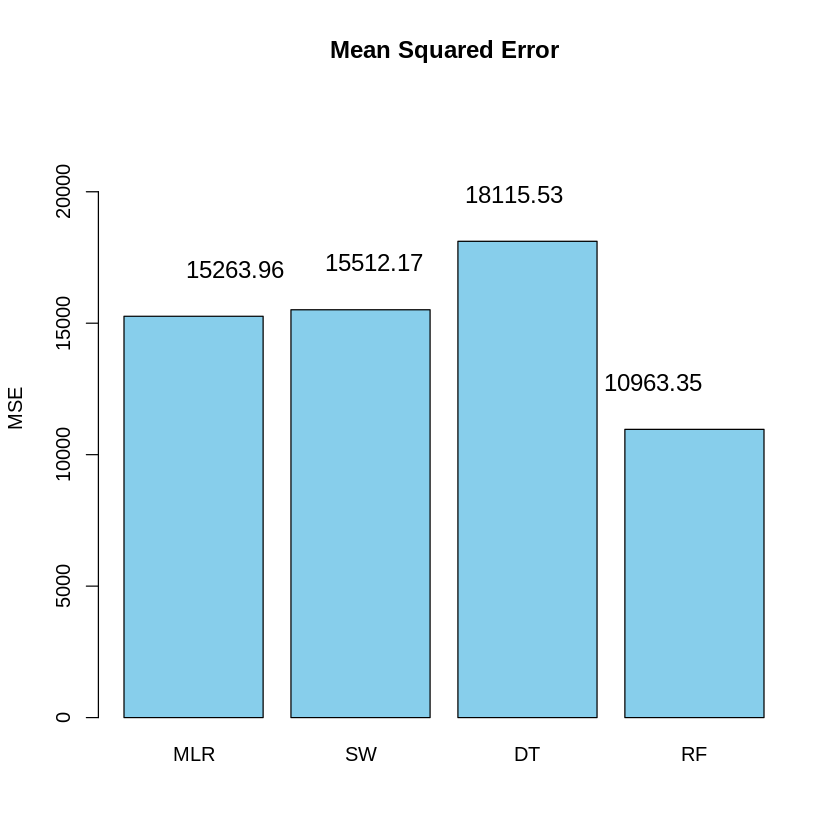

In [ ]:
# Create a vector of model names
models <- c("MLR", "SW", "DT", "RF")

# Create a vector of MSE values for each model
mse_values <- c(mse_mlr, mse_sw, mse_dt, mse_rf)

# Set the ylim to include the maximum MSE value plus a buffer for readability
ylim_max <- max(mse_values) * 1.3  # Add a buffer of 10% to the maximum value
barplot(mse_values, names.arg = models, col = "skyblue", main = "Mean Squared Error", ylab = "MSE", ylim = c(0, ylim_max))

# Add data labels
text(x = 1:length(models), y = mse_values + 1000, labels = round(mse_values, 2), col = "black", pos = 3, cex = 1.2)



In [ ]:
# Calculate SSE and SST for model_mlr
SSE_model_mlr <- sum((test_df$Recommended_Customer_Price - pred_mlr)^2)
SST_model_mlr <- sum((test_df$Recommended_Customer_Price - mean(test_df$Recommended_Customer_Price))^2)

# Calculate accuracy for model_mlr
accuracy_model_mlr <- round((1 - SSE_model_mlr / SST_model_mlr) * 100, 2)

# Print accuracy for model_mlr
cat("The accuracy of model_mlr: ", accuracy_model_mlr, "%\n")


# Calculate SSE and SST for model_sw
SSE_model_sw <- sum((test_df$Recommended_Customer_Price - pred_sw)^2)
SST_model_sw <- sum((test_df$Recommended_Customer_Price - mean(test_df$Recommended_Customer_Price))^2)

# Calculate accuracy for model_sw
accuracy_model_sw <- round((1 - SSE_model_sw / SST_model_sw) * 100, 2)

# Print accuracy for model_sw
cat("The accuracy of model_sw: ", accuracy_model_sw, "%\n")


# Calculate SSE and SST for model_dt
SSE_model_dt <- sum((test_df$Recommended_Customer_Price - pred_dt)^2)
SST_model_dt <- sum((test_df$Recommended_Customer_Price - mean(test_df$Recommended_Customer_Price))^2)

# Calculate accuracy for model_dt
accuracy_model_dt <- round((1 - SSE_model_dt / SST_model_dt) * 100, 2)

# Print accuracy for model_dt
cat("The accuracy of model_dt: ", accuracy_model_dt, "%\n")


# Calculate SSE and SST for model_rf
SSE_model_rf <- sum((test_df$Recommended_Customer_Price - pred_rf)^2)
SST_model_rf <- sum((test_df$Recommended_Customer_Price - mean(test_df$Recommended_Customer_Price))^2)

# Calculate accuracy for model_rf
accuracy_model_rf <- round((1 - SSE_model_rf / SST_model_rf) * 100, 2)

# Print accuracy for model_rf
cat("The accuracy of model_rf: ", accuracy_model_rf, "%\n")


The accuracy of model_mlr:  57.97 %
The accuracy of model_sw:  57.29 %
The accuracy of model_dt:  50.12 %
The accuracy of model_rf:  69.81 %


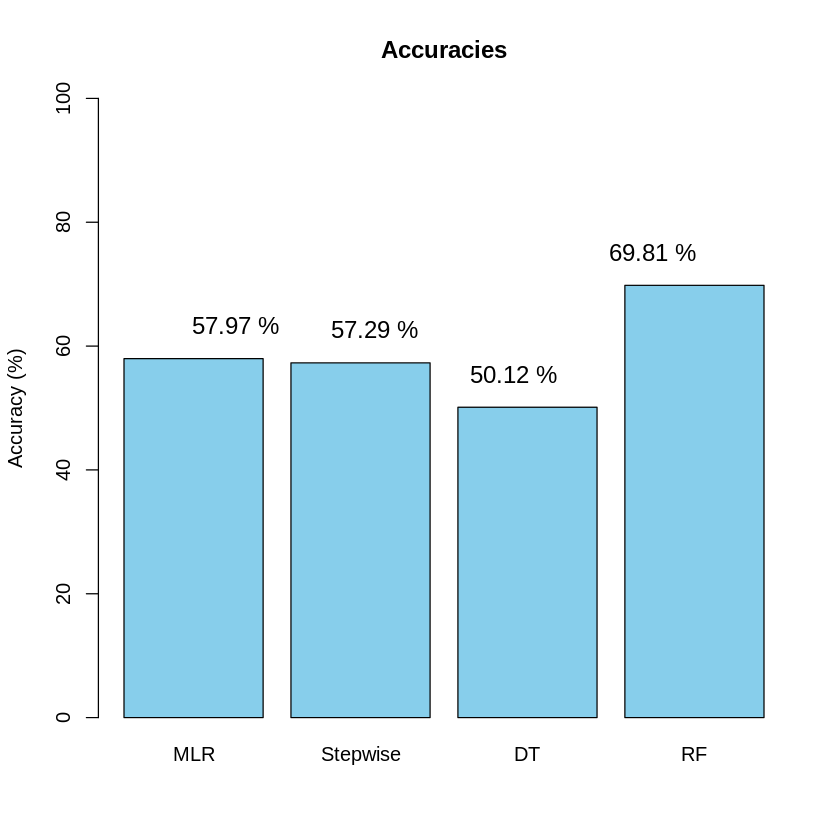

In [ ]:
# Create a vector of model names
models <- c("MLR", "Stepwise", "DT", "RF")

# Create a vector of accuracies for each model
accuracies <- c(accuracy_model_mlr, accuracy_model_sw, accuracy_model_dt, accuracy_model_rf)

# Create a bar plot
barplot(accuracies, names.arg = models, col = "skyblue", main = "Accuracies", ylab = "Accuracy (%)", ylim = c(0, 100))

# Add data labels
text(x = 1:length(models), y = accuracies + 2, labels = paste(accuracies, "%"), col = "black", pos = 3, cex = 1.2)


In [ ]:
                                     # Circular Queue Visualizer #
from tkinter import *
from tkinter import messagebox
import time
#Size of the Circular Queue taken as 6
class CircularQueue:
    def __init__(self,root):
        self.window = root
        self.make_canvas = Canvas(self.window,width=800,height=500,bg="chocolate",relief=RAISED,bd=8)
        self.make_canvas.pack()
        #Initialize somethings that should be NULL by default
        self.rear_indicator = None
        self.front_indicator = None
        self.rear_label = None
        self.front_label = None
        self.take_entry = None
        self.make_box = None
        self.take_input = None
        self.add_btn = None
        self.make_label = None
        self.make_insert = None
        self.make_delete = None
        #By default value set
        self.rear_index = -1
        self.front_index = -1
        self.input_label_x = 80
        self.input_label_y = 410
        self.index_marker = 85
        self.start_x = 0
        self.start_y = 0
        self.rear_move = 0
        self.rear_move_indicator = 62
        self.front_move_indicator = 62
        self.rear_label_position_controller = 176
        self.front_label_position_controller = 176
        #By default make list to store box number with label
        self.store_data = []
        #Default function call
        self.set_up()
        self.make_input_btn()

    def set_up(self):#For by default set up in canvas
        #Heading
        make_heading = Label(self.make_canvas,text="Circular Queue Visualizer",bg="chocolate",fg="yellow",font=("Arial",25,"bold","italic"))
        make_heading.place(x=200,y=20)
        #Make Queue Container
        self.make_canvas.create_line(229, 250, 611, 250,width=3,fill="yellow")
        self.make_canvas.create_line(229, 300, 611, 300, width=3,fill="yellow")

        take_x = 190
        for i in range(7):
            make_index = Label(self.make_canvas,text=i-1,bg="chocolate",fg="blue",font=("Arial",15,"bold"))
            make_index.place(x=take_x,y=165+50)
            take_x+=63
        # All about rear pointer
        points_rear = (205,255+50,205-20,(255+320)/2+50,205-10,(255+320)/2+50,205-10,320+50,205+10,320+50,205+10,(255+320)/2+50,205+20,(255+320)/2+50)
        self.rear_indicator = self.make_canvas.create_polygon(points_rear,width=3,fill="#0FFF0F",outline="black")
        self.rear_label = Label(self.make_canvas,text="rear",fg="brown",bg="chocolate",font=("Arial",20,"bold"))
        self.rear_label.place(x=self.rear_label_position_controller,y=323+50)
        # All about front pointer
        points_front = (205,160+50, 205-20,(160+90)/2+50, 205-10,(160+90)/2+50, 205-10,90+50, 205+10,90+50, 205+10,(160+90)/2+50, 205+20,(160+90)/2+50)
        self.front_indicator = self.make_canvas.create_polygon(points_front,width=3,fill="#0FFF0F",outline="black")
        self.front_label = Label(self.make_canvas, text="front", fg="brown", bg="chocolate", font=("Arial", 20, "bold"))
        self.front_label.place(x=self.front_label_position_controller, y=50+50)
        # All about index no.
        points_index = (660+20,230, (660+580)/2-7+20,230-20, (660+580)/2+20,230-7, 580+20,230-7, 580+20,230+7, (660+580)/2+20,230+7, (660+580)/2-7+20,230+20)
        self.make_canvas.create_polygon(points_index,width=3,fill="red",outline="black")
        index_no = Label(self.make_canvas,text="Index no.",fg="#9B1B30",bg="chocolate",font=("Arial",15,"bold"))
        index_no.place(x=690,y=215)

        # Make small room in queue
        self.make_canvas.create_rectangle(230, 253, 290, 297, width=3)
        self.make_canvas.create_rectangle(294, 253, 354, 297, width=3)
        self.make_canvas.create_rectangle(358, 253, 418, 297, width=3)
        self.make_canvas.create_rectangle(422, 253, 482, 297, width=3)
        self.make_canvas.create_rectangle(486, 253, 546, 297, width=3)
        self.make_canvas.create_rectangle(550, 253, 610, 297, width=3)

    def make_input_btn(self):#Make Insert and Delete Button
        self.make_insert = Button(self.window,text="Insert",font=("Arial",18,"bold"),fg="red",bg="black",relief=RAISED,bd=8,command=self.store)
        self.make_insert.place(x=30,y=530)

        self.make_delete = Button(self.window,text="Delete",font=("Arial",18,"bold"),fg="red",bg="black",relief=RAISED,bd=8,command=self.deletion)
        self.make_delete.place(x=670,y=530)

    def store(self):#For Insert value in Circular Queue
        if (self.rear_index == 5 and self.front_index == 0) or (self.rear_index+1==self.front_index):
            messagebox.showerror("Overflow","The Queue is full")
        else:
            self.make_insert['state'] = DISABLED
            self.make_delete['state'] = DISABLED

            self.take_input = Label(self.window, text="Enter the number to input", fg="blue", bg="orange", font=("Arial", 12, "bold"))
            self.take_input.place(x=300, y=530)
            self.take_entry = Entry(self.window, fg="blue", bg="white",relief=SUNKEN,bd=6,width=5, font=("Arial", 10, "bold"))
            self.take_entry.place(x=320, y=560)
            self.take_entry.focus()
            self.add_btn = Button(self.window,text="Add",fg="red", bg="black",relief=SUNKEN,bd=6,width=5, font=("Arial", 8, "bold"),command=lambda: self.box_insert(False),state=NORMAL)
            self.add_btn.place(x=400, y=560)
            self.window.bind('<Return>',self.box_insert)

    def box_insert(self,e):#Box insert in Queue
        self.take_input.place_forget()
        self.take_entry.place_forget()
        self.add_btn.place_forget()

        self.make_box = self.make_canvas.create_rectangle(60, 402, 120, 444, width=3, fill="black", outline="blue")
        self.make_label = Label(self.window, text=self.take_entry.get(), fg="red", bg="black", font=("Arial", 12, "bold"))
        self.make_label.place(x=self.input_label_x, y=self.input_label_y)

        if self.front_index>0 and self.rear_index==5:
            self.rear_reset()

        else:
            if self.rear_index < 5:
                self.rear_index += 1
            if self.front_index == -1:
                self.front_index = 0
            self.rear_move = 0
            while self.rear_move<self.rear_move_indicator:# Move rear and front arrow with label
                self.rear_label.place_forget()
                self.rear_label_position_controller+=2
                self.rear_label.place(x=self.rear_label_position_controller, y=323 + 50)
                self.make_canvas.move(self.rear_indicator,2,0)
                if self.rear_index == 0:#Only When rear == 0, then if front == -1,front = 0
                   self.front_label.place_forget()
                   self.front_label_position_controller +=2
                   self.front_label.place(x=self.front_label_position_controller, y=50 + 50)
                   self.make_canvas.move(self.front_indicator,2,0)
                self.rear_move+=2
                time.sleep(0.008)
                self.window.update()

        while self.start_y<37:#Block with label vertical movement
            self.make_label.place_forget()
            self.make_canvas.move(self.make_box,0,-4)
            self.start_y+=1
            self.input_label_y-=4
            self.make_label.place(x=self.input_label_x, y=self.input_label_y)
            time.sleep(0.005)
            self.window.update()

        while self.start_x<self.index_marker:#Block with label horizontal movement
            self.make_label.place_forget()
            self.make_canvas.move(self.make_box,2,0)
            self.start_x+=1
            self.input_label_x += 2
            self.make_label.place(x=self.input_label_x, y=self.input_label_y)
            self.window.update()

        self.reset_and_store()

    def rear_reset(self):#When rear is 5 and again input value, rear becomes at 0 index
        rear_move = 312
        while rear_move > 0:
            self.rear_label.place_forget()
            self.rear_label_position_controller -= 2
            self.rear_label.place(x=self.rear_label_position_controller, y=323 + 50)
            self.make_canvas.move(self.rear_indicator, -2, 0)
            if self.rear_index == 0:
                self.front_label.place_forget()
                self.front_label_position_controller -= 2
                self.front_label.place(x=self.front_label_position_controller, y=50 + 50)
                self.make_canvas.move(self.front_indicator, -2, 0)
            rear_move -= 2
            time.sleep(0.01)
            self.window.update()
        self.index_marker = 85
        self.rear_index = 0

    def reset_and_store(self):#For reset some variable and store box value with corresponding label
        temp =[]
        temp.append(self.make_box)
        temp.append(self.make_label)
        self.store_data.append(temp)
        self.start_x = 0
        self.start_y = 0
        self.index_marker+=32
        self.input_label_x = 80
        self.input_label_y = 410
        self.make_insert['state'] = NORMAL
        self.make_delete['state'] = NORMAL

    def deletion(self):#For delete a value from the Queue
        if self.front_index == -1 and self.rear_index == -1:
            messagebox.showerror("Underflow","The Queue is empty")
        else:
            self.make_insert['state'] = DISABLED
            self.make_delete['state'] = DISABLED
            if self.store_data:
                self.make_canvas.delete(self.store_data[0][0])
                self.store_data[0][1].place_forget()
                self.store_data.pop(0)

            if self.rear_index==self.front_index:
                self.default_reset()
            elif self.front_index == 5 and self.rear_index<self.front_index:
                self.take_zero_reset()
            else:
                front_move = 0
                while front_move < self.front_move_indicator:
                    self.front_label.place_forget()
                    self.front_label_position_controller += 2
                    self.front_label.place(x=self.front_label_position_controller, y=50 + 50)
                    self.make_canvas.move(self.front_indicator, 2, 0)
                    front_move += 2
                    time.sleep(0.01)
                    self.window.update()
                if self.front_index < 5:
                    self.front_index += 1
            self.make_insert['state'] = NORMAL
            self.make_delete['state'] = NORMAL

    def default_reset(self):#When rear == front, set both at -1
        while self.rear_label_position_controller != 176:
            self.rear_label.place_forget()
            self.front_label.place_forget()
            self.rear_label_position_controller -= 2
            self.front_label_position_controller -=2
            self.rear_label.place(x=self.rear_label_position_controller, y=323 + 50)
            self.front_label.place(x=self.front_label_position_controller, y=50 + 50)
            self.make_canvas.move(self.rear_indicator, -2, 0)
            self.make_canvas.move(self.front_indicator,-2, 0)
            time.sleep(0.008)
            self.window.update()

        self.front_index = -1
        self.rear_index = -1
        self.index_marker = 85

    def take_zero_reset(self):#When front == 5 , then after deletion set front at 0
        front_move = 312
        while front_move > 0:
            self.front_label.place_forget()
            self.front_label_position_controller -= 2
            self.front_label.place(x=self.front_label_position_controller, y=50 + 50)
            self.make_canvas.move(self.front_indicator, -2, 0)
            front_move -= 2
            time.sleep(0.008)
            self.window.update()
        self.front_index = 0

if __name__ == '__main__':
    window = Tk()
    window.title("Circular Queue Visualizer")
    window.geometry("800x600")
    window.maxsize(800,600)
    window.minsize(800,600)
    window.iconbitmap("circular_queue_icon.ico")
    window.config(bg="orange")
    CircularQueue(window)
    window.mainloop()